<div style="text-align: center; margin-bottom: 10px;">
    <h1 style="color: #003366; font-family: Arial, sans-serif;">Telco Customer Churn Analysis</h1>
</div>


<div style="text-align: center; #003366; margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">1. Introduction</h2>
</div>

Customer churn, the rate at which customers stop doing business with an entity, is a critical issue for companies. Understanding the factors contributing to churn is essential for implementing effective retention strategies.


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Objective</h3>
</div>

Analyze the Telco Customer Churn dataset to:
- Identify patterns and key factors contributing to customer churn.
- Provide actionable insights to reduce churn rates.
- Enhance customer satisfaction and lifetime value.

This notebook aims to uncover actionable insights to help Telco improve customer retention and reduce churn rates.


<div style=" margin-bottom: 10px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">2. Dataset Overview and Preparation</h2>
</div>

<div style=" margin-bottom: 10px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">2.1. Dataset Description</h3>
</div>

<div style="font-family: Arial, sans-serif;">
    <p>
        The Telco customer churn data contains information about a fictional telco company that provided home phone and Internet services to <strong>7043 customers</strong> in California in Q3. It indicates which customers have left, stayed, or signed up for their service. Multiple important demographics are included for each customer, as well as a <strong>Churn Score</strong> and <strong>Customer Lifetime Value (CLTV)</strong> index.
    </p>

<h4 style="color: #003366;">Data Description</h4>

<ul style="margin-left: 20px;">
<li><strong>Observations:</strong> 7043 rows</li>
<li><strong>Variables:</strong> 33 columns</li>
</ul>

<h4 style="color: #003366;">Key Variables</h4>

<ul style="margin-left: 20px;">
<li><strong>CustomerID:</strong> A unique ID that identifies each customer.</li>
<li><strong>Demographics:</strong>
    <ul style="margin-left: 20px;">
        <li><strong>Gender:</strong> Male, Female.</li>
        <li><strong>Senior Citizen:</strong> Indicates if the customer is 65 or older: Yes, No.</li>
        <li><strong>Partner:</strong> Indicates if the customer has a partner: Yes, No.</li>
        <li><strong>Dependents:</strong> Indicates if the customer lives with any dependents: Yes, No.</li>
    </ul>
</li>
<li><strong>Geographical Information:</strong>
    <ul style="margin-left: 20px;">
        <li><strong>Country, State, City, Zip Code:</strong> Customer’s primary residence details.</li>
        <li><strong>Lat Long, Latitude, Longitude:</strong> Coordinates of the customer’s residence.</li>
    </ul>
</li>
<li><strong>Services:</strong>
    <ul style="margin-left: 20px;">
        <li><strong>Phone Service:</strong> Yes, No.</li>
        <li><strong>Multiple Lines:</strong> Yes, No.</li>
        <li><strong>Internet Service:</strong> No, DSL, Fiber Optic, Cable.</li>
        <li><strong>Value-Added Services:</strong>
            <ul style="margin-left: 20px;">
                <li><strong>Online Security, Online Backup, Device Protection, Tech Support:</strong> Yes, No.</li>
                <li><strong>Streaming TV, Streaming Movies:</strong> Yes, No.</li>
            </ul>
        </li>
    </ul>
</li>
<li><strong>Billing and Payment:</strong>
    <ul style="margin-left: 20px;">
        <li><strong>Contract Type:</strong> Month-to-Month, One Year, Two Year.</li>
        <li><strong>Paperless Billing:</strong> Yes, No.</li>
        <li><strong>Payment Method:</strong> Bank Withdrawal, Credit Card, Mailed Check.</li>
        <li><strong>Monthly Charges:</strong> Current total monthly charge.</li>
        <li><strong>Total Charges:</strong> Total charges to date.</li>
    </ul>
</li>
<li><strong>Churn Information:</strong>
    <ul style="margin-left: 20px;">
        <li><strong>Churn Label:</strong> Yes/No.</li>
        <li><strong>Churn Value:</strong> 1 = churned, 0 = not churned.</li>
        <li><strong>Churn Score:</strong> A score (0–100) indicating churn likelihood.</li>
        <li><strong>Churn Reason:</strong> The specific reason for churn (if applicable).</li>
    </ul>
</li>
<li><strong>Customer Lifetime Value (CLTV):</strong> Predicted value of the customer to the company.</li>
</ul>
</div>


<h3 style="color: #003366;">Imports and Setup</h3>

In [2]:
# Importing essential libraries
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical operations
import matplotlib.pyplot as plt  # Visualization (static plots)
import seaborn as sns            # Statistical data visualization
import plotly.express as px      # Interactive data visualization
import math                      # Mathematical operations

# Setting display options for inline plots and dataframes
%matplotlib inline
from IPython.display import display
pd.set_option('display.max_columns', None)  # Ensure all columns are visible in output

# Suppressing warnings for a cleaner notebook output
import warnings
warnings.filterwarnings("ignore")

# Verifying imports
print("Libraries imported successfully!")


Libraries imported successfully!


<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;"> Custom Visualization Theme</h3>
</div>

Custom blue theme applied for clean and consistent visuals in Matplotlib and Seaborn.


In [3]:
# Define the extended monochromatic theme
base_color = "#1f77b4"  # Base blue color
theme_colors = {
    "dark": "#144d77",          # Darker shade for text and strong emphasis
    "base": "#1f77b4",          # Base blue for main visual elements
    "light": "#a6c8e0",         # Lighter shade for accents
    "background": "#f6fafd",    # Very light background for cleaner visuals
    "darker": "#0f3a55",        # Even darker shade for highlights
    "mid": "#3979a5",           # Mid-tone shade for balance
    "highlight": "#63a1d6",     # Highlight shade for focus areas
    "very_light": "#d9ecf6",    # Very light shade for subtle elements
}

# Apply the theme to Matplotlib
plt.rcParams.update({
    "axes.facecolor": theme_colors["background"],   # Axes background color
    "axes.edgecolor": theme_colors["darker"],      # Axes border color
    "axes.labelcolor": theme_colors["dark"],       # Axes label color
    "xtick.color": theme_colors["dark"],           # X-axis tick color
    "ytick.color": theme_colors["dark"],           # Y-axis tick color
    "grid.color": theme_colors["light"],           # Grid line color
    "grid.alpha": 0.7,                             # Grid line transparency
    "figure.facecolor": theme_colors["background"],# Figure background color
    "text.color": theme_colors["dark"],            # Default text color
})

# Apply the theme to Seaborn
sns.set_theme(
    style="white", 
    palette=[
        theme_colors["dark"], 
        theme_colors["base"], 
        theme_colors["light"], 
        theme_colors["highlight"]
    ]
)

# Print confirmation
print("Custom visualization theme applied successfully!")


Custom visualization theme applied successfully!


<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Dataset Loading and Initial Inspection</h3>
</div>


The dataset is loaded from the Excel file and copied for analysis.


In [4]:
# Load the dataset from the Excel file
original_df = pd.read_excel('Telco_customer_churn.xlsx')

# Create a copy of the dataset for analysis
df = original_df.copy()

# Display the first few rows to check the data
df.head()


CustomerID  Count        Country       State         City  Zip Code  \
0  3668-QPYBK      1  United States  California  Los Angeles     90003   
1  9237-HQITU      1  United States  California  Los Angeles     90005   
2  9305-CDSKC      1  United States  California  Los Angeles     90006   
3  7892-POOKP      1  United States  California  Los Angeles     90010   
4  0280-XJGEX      1  United States  California  Los Angeles     90015   

                 Lat Long   Latitude   Longitude  Gender Senior Citizen  \
0  33.964131, -118.272783  33.964131 -118.272783    Male             No   
1   34.059281, -118.30742  34.059281 -118.307420  Female             No   
2  34.048013, -118.293953  34.048013 -118.293953  Female             No   
3  34.062125, -118.315709  34.062125 -118.315709  Female             No   
4  34.039224, -118.266293  34.039224 -118.266293    Male             No   

  Partner Dependents  Tenure Months Phone Service Multiple Lines  \
0      No         No              2           Yes             No   
1      No        Yes              2           Yes             No   
2      No        Yes              8           Yes            Yes   
3     Yes        Yes             28           Yes            Yes   
4      No        Yes             49           Yes            Yes   

  Internet Service Online Security Online Backup Device Protection  \
0              DSL             Yes           Yes                No   
1      Fiber optic              No            No                No   
2      Fiber optic              No            No               Yes   
3      Fiber optic              No            No               Yes   
4      Fiber optic              No           Yes               Yes   

  Tech Support Streaming TV Streaming Movies        Contract  \
0           No           No               No  Month-to-month   
1           No           No               No  Month-to-month   
2           No          Yes              Yes  Month-to-month   
3          Yes          Yes              Yes  Month-to-month   
4           No          Yes              Yes  Month-to-month   

  Paperless Billing             Payment Method  Monthly Charges Total Charges  \
0               Yes               Mailed check            53.85        108.15   
1               Yes           Electronic check            70.70        151.65   
2               Yes           Electronic check            99.65         820.5   
3               Yes           Electronic check           104.80       3046.05   
4               Yes  Bank transfer (automatic)           103.70        5036.3   

  Churn Label  Churn Value  Churn Score  CLTV                   Churn Reason  
0         Yes            1           86  3239   Competitor made better offer  
1         Yes            1           67  2701                          Moved  
2         Yes            1           86  5372                          Moved  
3         Yes            1           84  5003                          Moved  
4         Yes            1           89  5340  Competitor had better devices

In [5]:
# Display the column names of the dataset
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [6]:
# Generate summary statistics for numerical columns
df.describe()

Count      Zip Code     Latitude    Longitude  Tenure Months  \
count  7043.0   7043.000000  7043.000000  7043.000000    7043.000000   
mean      1.0  93521.964646    36.282441  -119.798880      32.371149   
std       0.0   1865.794555     2.455723     2.157889      24.559481   
min       1.0  90001.000000    32.555828  -124.301372       0.000000   
25%       1.0  92102.000000    34.030915  -121.815412       9.000000   
50%       1.0  93552.000000    36.391777  -119.730885      29.000000   
75%       1.0  95351.000000    38.224869  -118.043237      55.000000   
max       1.0  96161.000000    41.962127  -114.192901      72.000000   

       Monthly Charges  Churn Value  Churn Score         CLTV  
count      7043.000000  7043.000000  7043.000000  7043.000000  
mean         64.761692     0.265370    58.699418  4400.295755  
std          30.090047     0.441561    21.525131  1183.057152  
min          18.250000     0.000000     5.000000  2003.000000  
25%          35.500000     0.000000    40.000000  3469.000000  
50%          70.350000     0.000000    61.000000  4527.000000  
75%          89.850000     1.000000    75.000000  5380.500000  
max         118.750000     1.000000   100.000000  6500.000000

In [7]:
# Generate summary statistics for categorical columns
df.describe(include=['object', 'category'])

CustomerID        Country       State         City  \
count         7043           7043        7043         7043   
unique        7043              1           1         1129   
top     3668-QPYBK  United States  California  Los Angeles   
freq             1           7043        7043          305   

                      Lat Long Gender Senior Citizen Partner Dependents  \
count                     7043   7043           7043    7043       7043   
unique                    1652      2              2       2          2   
top     33.964131, -118.272783   Male             No      No         No   
freq                         5   3555           5901    3641       5416   

       Phone Service Multiple Lines Internet Service Online Security  \
count           7043           7043             7043            7043   
unique             2              3                3               3   
top              Yes             No      Fiber optic              No   
freq            6361           3390             3096            3498   

       Online Backup Device Protection Tech Support Streaming TV  \
count           7043              7043         7043         7043   
unique             3                 3            3            3   
top               No                No           No           No   
freq            3088              3095         3473         2810   

       Streaming Movies        Contract Paperless Billing    Payment Method  \
count              7043            7043              7043              7043   
unique                3               3                 2                 4   
top                  No  Month-to-month               Yes  Electronic check   
freq               2785            3875              4171              2365   

        Total Charges Churn Label                Churn Reason  
count          7043.0        7043                        1869  
unique         6531.0           2                          20  
top              20.2          No  Attitude of support person  
freq             11.0        5174                         192

In [8]:
# Display a concise summary of the dataset, including the number of non-null values, data types, and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [9]:
# Check for missing values in the dataset
df.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
Churn Value             0
Churn Score             0
CLTV                    0
Churn Reason         5174
dtype: int64

In [10]:
# Check the distribution of churn labels
df['Churn Label'].value_counts()

Churn Label
No     5174
Yes    1869
Name: count, dtype: int64

**The dataset is mostly clean, except for the *`Churn Reason`* column, which contains null values. These null values are expected since they correspond to non-churned customers, where no churn reason would apply.**

In [11]:
# Check for duplicate rows in the dataset
df.duplicated().sum()

0

In [12]:
# Check for duplicate CustomerID values
df.duplicated(subset='CustomerID').sum()

0

The dataset contains **no duplicate records**, ensuring clean and reliable data for analysis.

In [13]:
df[df.columns[(df.nunique()>1)]]

CustomerID          City  Zip Code                Lat Long   Latitude  \
0     3668-QPYBK   Los Angeles     90003  33.964131, -118.272783  33.964131   
1     9237-HQITU   Los Angeles     90005   34.059281, -118.30742  34.059281   
2     9305-CDSKC   Los Angeles     90006  34.048013, -118.293953  34.048013   
3     7892-POOKP   Los Angeles     90010  34.062125, -118.315709  34.062125   
4     0280-XJGEX   Los Angeles     90015  34.039224, -118.266293  34.039224   
...          ...           ...       ...                     ...        ...   
7038  2569-WGERO       Landers     92285  34.341737, -116.539416  34.341737   
7039  6840-RESVB      Adelanto     92301  34.667815, -117.536183  34.667815   
7040  2234-XADUH         Amboy     92304  34.559882, -115.637164  34.559882   
7041  4801-JZAZL  Angelus Oaks     92305     34.1678, -116.86433  34.167800   
7042  3186-AJIEK  Apple Valley     92308  34.424926, -117.184503  34.424926   

       Longitude  Gender Senior Citizen Partner Dependents  Tenure Months  \
0    -118.272783    Male             No      No         No              2   
1    -118.307420  Female             No      No        Yes              2   
2    -118.293953  Female             No      No        Yes              8   
3    -118.315709  Female             No     Yes        Yes             28   
4    -118.266293    Male             No      No        Yes             49   
...          ...     ...            ...     ...        ...            ...   
7038 -116.539416  Female             No      No         No             72   
7039 -117.536183    Male             No     Yes        Yes             24   
7040 -115.637164  Female             No     Yes        Yes             72   
7041 -116.864330  Female             No     Yes        Yes             11   
7042 -117.184503    Male             No      No         No             66   

     Phone Service    Multiple Lines Internet Service      Online Security  \
0              Yes                No              DSL                  Yes   
1              Yes                No      Fiber optic                   No   
2              Yes               Yes      Fiber optic                   No   
3              Yes               Yes      Fiber optic                   No   
4              Yes               Yes      Fiber optic                   No   
...            ...               ...              ...                  ...   
7038           Yes                No               No  No internet service   
7039           Yes               Yes              DSL                  Yes   
7040           Yes               Yes      Fiber optic                   No   
7041            No  No phone service              DSL                  Yes   
7042           Yes                No      Fiber optic                  Yes   

            Online Backup    Device Protection         Tech Support  \
0                     Yes                   No                   No   
1                      No                   No                   No   
2                      No                  Yes                   No   
3                      No                  Yes                  Yes   
4                     Yes                  Yes                   No   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039                   No                  Yes                  Yes   
7040                  Yes                  Yes                   No   
7041                   No                   No                   No   
7042                   No                  Yes                  Yes   

             Streaming TV     Streaming Movies        Contract  \
0                      No                   No  Month-to-month   
1                      No                   No  Month-to-month   
2                     Yes                  Yes  Month-to-month   
3                     Yes                  Yes  Month-to-month   
4           

<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">2.2 Data Cleaning and Preprocessing</h3>
</div>


<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Selecting Relevant Columns for Analysis</h3>
</div>

Irrelevant columns like `Count`, `Country`, `State`, and `Customer ID` are dropped for more meaningful analysis. Additionally, one of the redundant churn columns (`Churn Label` or `Churn Value`) is excluded.


In [14]:
# Dropping irrelevant columns for analysis
df = df[['City', 'Gender', 'Senior Citizen', 'Partner', 'Dependents', 'Tenure Months',
         'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 
         'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 
         'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 
         'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Score', 'CLTV', 
         'Churn Reason', 'Latitude', 'Longitude', 'Zip Code']]
df.head()

City  Gender Senior Citizen Partner Dependents  Tenure Months  \
0  Los Angeles    Male             No      No         No              2   
1  Los Angeles  Female             No      No        Yes              2   
2  Los Angeles  Female             No      No        Yes              8   
3  Los Angeles  Female             No     Yes        Yes             28   
4  Los Angeles    Male             No      No        Yes             49   

  Phone Service Multiple Lines Internet Service Online Security Online Backup  \
0           Yes             No              DSL             Yes           Yes   
1           Yes             No      Fiber optic              No            No   
2           Yes            Yes      Fiber optic              No            No   
3           Yes            Yes      Fiber optic              No            No   
4           Yes            Yes      Fiber optic              No           Yes   

  Device Protection Tech Support Streaming TV Streaming Movies  \
0                No           No           No               No   
1                No           No           No               No   
2               Yes           No          Yes              Yes   
3               Yes          Yes          Yes              Yes   
4               Yes           No          Yes              Yes   

         Contract Paperless Billing             Payment Method  \
0  Month-to-month               Yes               Mailed check   
1  Month-to-month               Yes           Electronic check   
2  Month-to-month               Yes           Electronic check   
3  Month-to-month               Yes           Electronic check   
4  Month-to-month               Yes  Bank transfer (automatic)   

   Monthly Charges Total Charges Churn Label  Churn Score  CLTV  \
0            53.85        108.15         Yes           86  3239   
1            70.70        151.65         Yes           67  2701   
2            99.65         820.5         Yes           86  5372   
3           104.80       3046.05         Yes           84  5003   
4           103.70        5036.3         Yes           89  5340   

                    Churn Reason   Latitude   Longitude  Zip Code  
0   Competitor made better offer  33.964131 -118.272783     90003  
1                          Moved  34.059281 -118.307420     90005  
2                          Moved  34.048013 -118.293953     90006  
3                          Moved  34.062125 -118.315709     90010  
4  Competitor had better devices  34.039224 -118.266293     90015

<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Data Type Optimization & Handling missing values</h3>
</div>

In [15]:
df[df.columns[df.nunique()<6]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Gender             7043 non-null   object
 1   Senior Citizen     7043 non-null   object
 2   Partner            7043 non-null   object
 3   Dependents         7043 non-null   object
 4   Phone Service      7043 non-null   object
 5   Multiple Lines     7043 non-null   object
 6   Internet Service   7043 non-null   object
 7   Online Security    7043 non-null   object
 8   Online Backup      7043 non-null   object
 9   Device Protection  7043 non-null   object
 10  Tech Support       7043 non-null   object
 11  Streaming TV       7043 non-null   object
 12  Streaming Movies   7043 non-null   object
 13  Contract           7043 non-null   object
 14  Paperless Billing  7043 non-null   object
 15  Payment Method     7043 non-null   object
 16  Churn Label        7043 non-null   object


In [16]:
# Convert columns with less than 6 unique values to 'category' data type to optimize memory usage
df[df.columns[df.nunique() < 6]] = df[df.columns[df.nunique() < 6]].astype('category')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   City               7043 non-null   object  
 1   Gender             7043 non-null   category
 2   Senior Citizen     7043 non-null   category
 3   Partner            7043 non-null   category
 4   Dependents         7043 non-null   category
 5   Tenure Months      7043 non-null   int64   
 6   Phone Service      7043 non-null   category
 7   Multiple Lines     7043 non-null   category
 8   Internet Service   7043 non-null   category
 9   Online Security    7043 non-null   category
 10  Online Backup      7043 non-null   category
 11  Device Protection  7043 non-null   category
 12  Tech Support       7043 non-null   category
 13  Streaming TV       7043 non-null   category
 14  Streaming Movies   7043 non-null   category
 15  Contract           7043 non-null   category
 16  Paperl

In [18]:
(df['Total Charges']==' ').sum()

11

In [19]:
((df['Total Charges']==' ').sum()/df.shape[0])*100

0.1561834445548772

In [20]:
df[df['Total Charges']==' ']

City  Gender Senior Citizen Partner Dependents  Tenure Months  \
2234  San Bernardino  Female             No     Yes         No              0   
2438    Independence    Male             No      No         No              0   
2568       San Mateo  Female             No     Yes         No              0   
2667       Cupertino    Male             No     Yes        Yes              0   
2856        Redcrest  Female             No     Yes         No              0   
4331     Los Angeles    Male             No     Yes        Yes              0   
4687        Sun City    Male             No     Yes        Yes              0   
5104      Ben Lomond  Female             No     Yes        Yes              0   
5719        La Verne    Male             No     Yes        Yes              0   
6772            Bell  Female             No     Yes        Yes              0   
6840      Wilmington    Male             No      No        Yes              0   

     Phone Service    Multiple Lines Internet Service      Online Security  \
2234            No  No phone service              DSL                  Yes   
2438           Yes                No               No  No internet service   
2568           Yes                No              DSL                  Yes   
2667           Yes               Yes               No  No internet service   
2856            No  No phone service              DSL                  Yes   
4331           Yes                No               No  No internet service   
4687           Yes               Yes               No  No internet service   
5104           Yes                No               No  No internet service   
5719           Yes                No               No  No internet service   
6772           Yes               Yes              DSL                   No   
6840           Yes               Yes              DSL                  Yes   

            Online Backup    Device Protection         Tech Support  \
2234                   No                  Yes                  Yes   
2438  No internet service  No internet service  No internet service   
2568                  Yes                  Yes                   No   
2667  No internet service  No internet service  No internet service   
2856                  Yes                  Yes                  Yes   
4331  No internet service  No internet service  No internet service   
4687  No internet service  No internet service  No internet service   
5104  No internet service  No internet service  No internet service   
5719  No internet service  No internet service  No internet service   
6772                  Yes                  Yes                  Yes   
6840                  Yes                   No                  Yes   

             Streaming TV     Streaming Movies  Contract Paperless Billing  \
2234                  Yes                   No  Two year               Yes   
2438  No internet service  No internet service  Two year                No   
2568                  Yes                  Yes  Two year                No   
2667  No internet service  No internet service  Two year                No   
2856                  Yes                   No  Two year                No   
4331  No internet service  No internet service  Two year                No   
4687  No internet service  No internet service  Two year                No   
5104  No internet service  No internet service  Two year                No   
5719  No internet service  No internet service  One year               Yes   
6772                  Yes                   No  Two year                No   
6840                   No                   No  Two year               Yes   

                 Payment Method  Monthly Charges Total Charges Churn Label  \
2234  Bank transfer (automatic)            52.55                        No   
2438               Mailed check            20.25                        No   
2568               Mailed check            80.85                        No   
2667

**11 records with missing values in the 'Total Charges' column (0.15% of the dataset) are dropped, as their impact on the analysis is minimal.**


In [21]:
df = df[df['Total Charges']!=' ']

In [22]:
(df['Total Charges']==' ').sum()

0

In [23]:
df.shape

(7032, 27)

In [24]:
# Convert 'Total Charges' column to float data type
df['Total Charges'] = df['Total Charges'].astype('float')

In [25]:
df['Total Charges'].dtype

dtype('float64')

<div style=" margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">3. Exploratory Data Analysis (EDA)</h2>
</div>


<div style=" margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">3.1. Churn Overview</h2>
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Customer Churn Visualization</h3>
</div>

- A **bar chart** shows the count of churned versus non-churned customers.
- A **pie chart** visualizes the percentage distribution of churned customers.


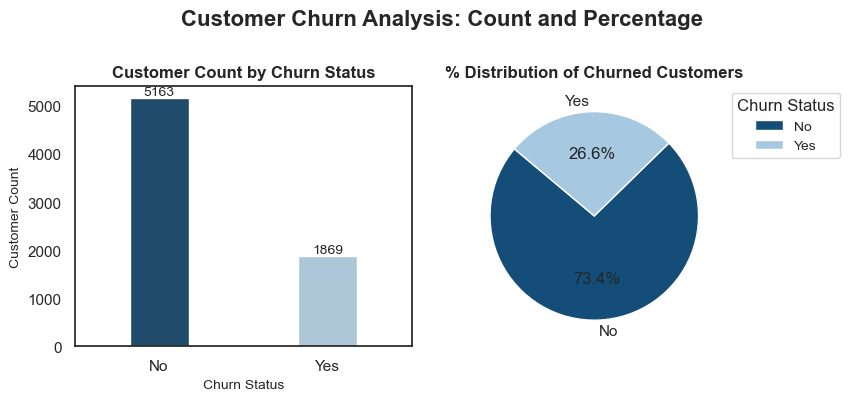

In [26]:
# Creating a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(9, 4))

# Plot the count of churned customers as a bar chart
sns.countplot(x='Churn Label', data=df, ax=axes[0], 
              palette=[theme_colors["dark"], theme_colors["light"]],
              dodge=False, hue='Churn Label', width=0.35)
axes[0].set_title('Customer Count by Churn Status', fontsize=12, weight='bold')
axes[0].set_xlabel('Churn Status', fontsize=10)
axes[0].set_ylabel('Customer Count', fontsize=10)

# Add bar labels to show exact counts
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d', fontsize=10)

# Plot the pie chart showing percentage of churned customers
temp = df.groupby('Churn Label', observed=True)['Churn Label'].count().rename('Churn')
axes[1].pie(
    temp, 
    labels=temp.index, 
    autopct='%.1f%%', 
    startangle=140, 
    colors=sns.color_palette([theme_colors["dark"], theme_colors["light"]], len(temp)), 
    explode=[0.1 if i == 'Churned' else 0 for i in temp.index]
)
axes[1].set_title('% Distribution of Churned Customers', fontsize=12, weight='bold')

# Add a suptitle for the entire figure
fig.suptitle('Customer Churn Analysis: Count and Percentage', fontsize=16, weight='bold', y=1)

# Add a legend for the pie chart
axes[1].legend(labels=temp.index, title='Churn Status', loc='best', fontsize=10,bbox_to_anchor=(1,1))

# Adjust layout and spacing
plt.tight_layout()

# Show plots
plt.show()


<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Insights :</h3>
</div>

The pie chart shows that around **26.6% (1869 customers)** have churned. Let’s now analyze the possible reasons behind this churn by exploring factors like customer demographics, service usage, and subscription plans.

<div style=" margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">3.2 Demographic Analysis</h2>
</div>


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Churn Analysis by Gender
    </h3>
</div>


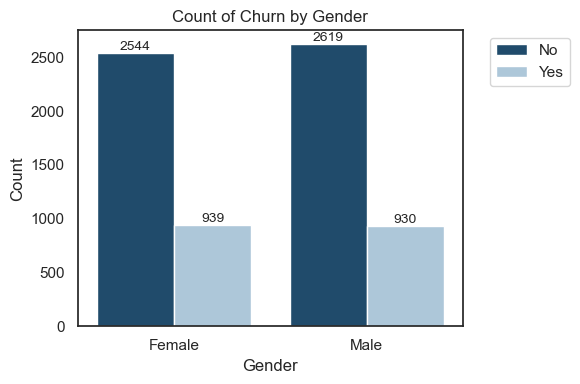

In [27]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(x='Gender', data=df, hue='Churn Label', 
              palette=[theme_colors["dark"],theme_colors["light"]])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Count of Churn by Gender')
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.tight_layout()
plt.show()


In [28]:
crosstab_data = (pd.crosstab(df['Gender'], df['Churn Label'], normalize=True,margins=True) * 100).round(2)
crosstab_data 

Churn Label     No    Yes     All
Gender                           
Female       36.18  13.35   49.53
Male         37.24  13.23   50.47
All          73.42  26.58  100.00

<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Insights : </h3>
</div>

The bar graph shows that **churn is not influenced by gender**. The data distribution is nearly equal, with **50% males and 50% females**. The churn rate for both genders is also the same, at **13%**.

---

This indicates that gender has no significant impact on customer churn in this dataset.

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Churn Analysis by Senior Citizen Status
    </h3>
</div>

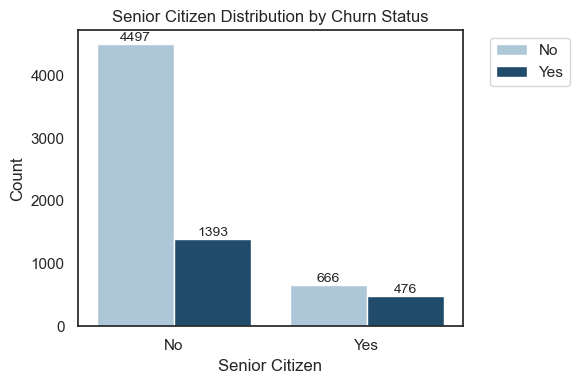

In [29]:
plt.figure(figsize=(6, 4))

ax = sns.countplot(x='Senior Citizen', data=df, hue='Churn Label', 
              palette=[theme_colors["light"],theme_colors["dark"]])

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Senior Citizen Distribution by Churn Status')
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Count')
for container in ax.containers:
    ax.bar_label(container, fmt='%d', fontsize=10)

plt.tight_layout()
plt.show()


In [30]:
crosstab_data1 = (pd.crosstab(df['Senior Citizen'], df['Churn Label'], normalize=True) * 100).round(2)
crosstab_data2 = (pd.crosstab(df['Senior Citizen'], df['Churn Label'], normalize='columns', margins=True) * 100).round(2)


display(crosstab_data1,crosstab_data2)


Churn Label        No    Yes
Senior Citizen              
No              63.95  19.81
Yes              9.47   6.77

Churn Label       No    Yes    All
Senior Citizen                    
No              87.1  74.53  83.76
Yes             12.9  25.47  16.24

<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights :  
    </h3>
</div>



- Senior citizens make up **16%** of the customer base. Among them, **25% have churned**, contributing to an **overall population percentage of 6.7%**.  
- Non-senior citizens account for **84%** of the customer base. Within this group, **12% have churned**, resulting in an **overall population contribution of 19.8%**.
---

This breakdown highlights that although senior citizens are a smaller demographic, their churn rate is significantly higher compared to non-senior citizens. However, non-senior citizens still dominate the total churn due to their larger population share.


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Partner and Dependents on Customer Churn
    </h3>
</div>

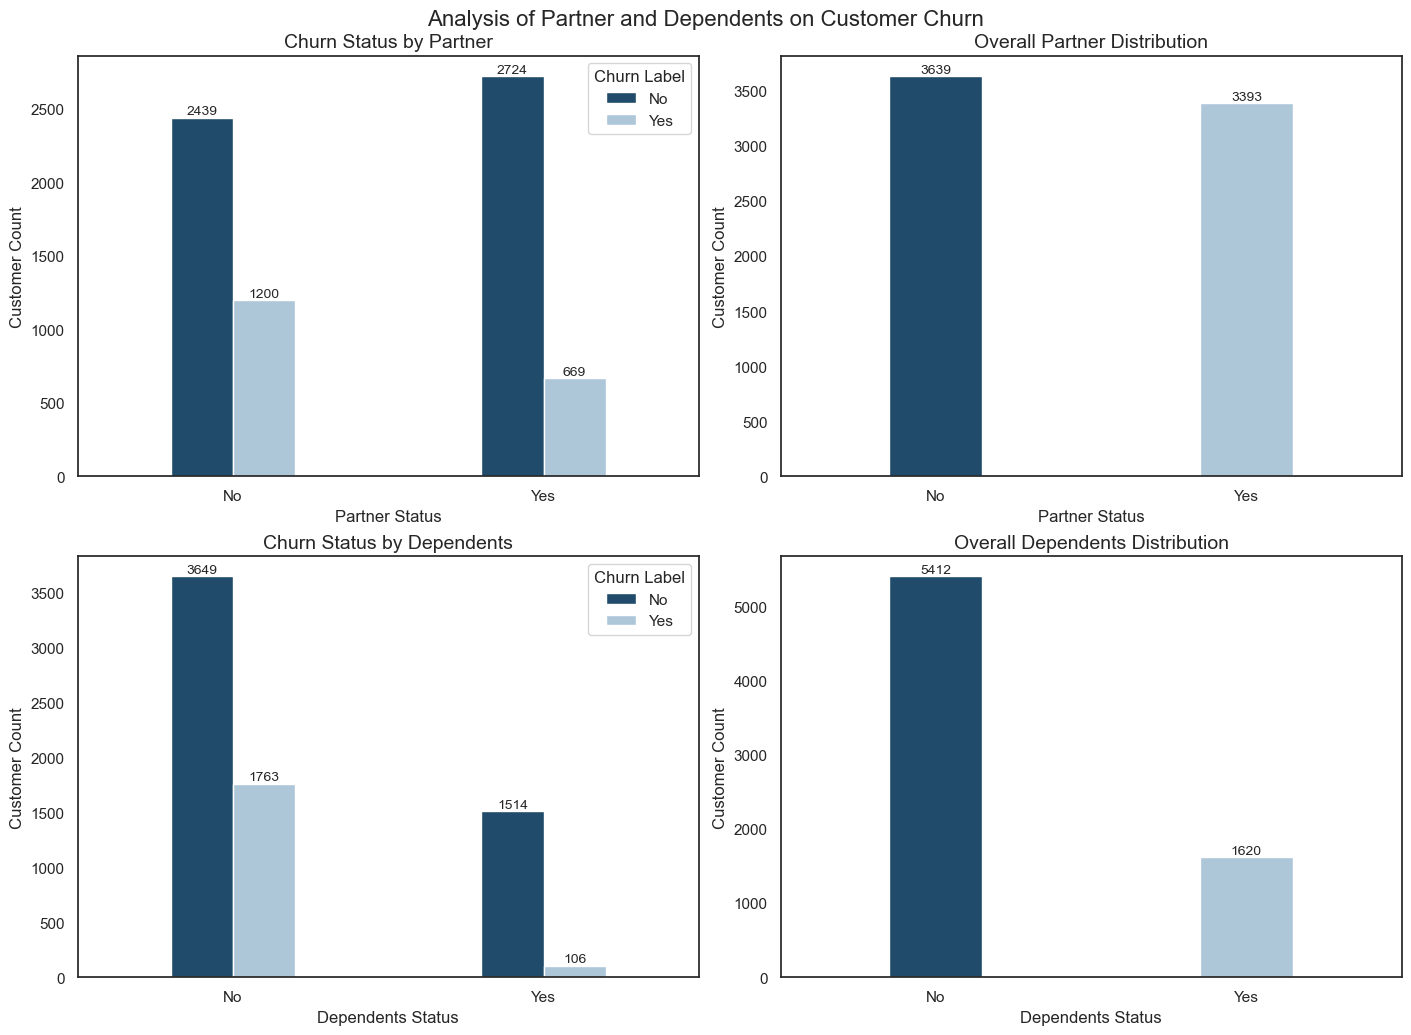

In [31]:
# Create the figure and axes for 2 rows and 2 columns
fig, axes = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)

# Plot 1: Churn Status by Partner
sns.countplot(x='Partner', data=df, hue='Churn Label',
              palette=[theme_colors["dark"], theme_colors["light"]], 
              ax=axes[0, 0],width=0.4)
axes[0, 0].set_title('Churn Status by Partner', fontsize=14)
axes[0, 0].set_xlabel('Partner Status', fontsize=12)
axes[0, 0].set_ylabel('Customer Count', fontsize=12)
for container in axes[0, 0].containers:
    axes[0, 0].bar_label(container, fontsize=10)

# Plot 2: Overall Partner Distribution (now swapped)
sns.countplot(x='Partner', data=df, hue='Partner', 
              palette=[theme_colors["dark"], theme_colors["light"]], 
              ax=axes[0, 1], legend=False,width=0.3)
axes[0, 1].set_title('Overall Partner Distribution', fontsize=14)
axes[0, 1].set_xlabel('Partner Status', fontsize=12)
axes[0, 1].set_ylabel('Customer Count', fontsize=12)
for container in axes[0, 1].containers:
    axes[0, 1].bar_label(container, fontsize=10)

# Plot 3: Churn Status by Dependents (now swapped)
sns.countplot(x='Dependents', data=df, hue='Churn Label', 
              palette=[theme_colors["dark"], theme_colors["light"]], 
              ax=axes[1, 0],width=0.4)
axes[1, 0].set_title('Churn Status by Dependents', fontsize=14)
axes[1, 0].set_xlabel('Dependents Status', fontsize=12)
axes[1, 0].set_ylabel('Customer Count', fontsize=12)
for container in axes[1, 0].containers:
    axes[1, 0].bar_label(container, fontsize=10)

# Plot 4: Overall Dependents Distribution
sns.countplot(x='Dependents', data=df, hue='Dependents',
              palette=[theme_colors["dark"], theme_colors["light"]], 
              ax=axes[1, 1], legend=False,width=0.3)
axes[1, 1].set_title('Overall Dependents Distribution', fontsize=14)
axes[1, 1].set_xlabel('Dependents Status', fontsize=12)
axes[1, 1].set_ylabel('Customer Count', fontsize=12)
for container in axes[1, 1].containers:
    axes[1, 1].bar_label(container, fontsize=10)

# Supertitle for the entire figure
fig.suptitle('Analysis of Partner and Dependents on Customer Churn', fontsize=16, y=1.02)

# Show the plots
plt.show()


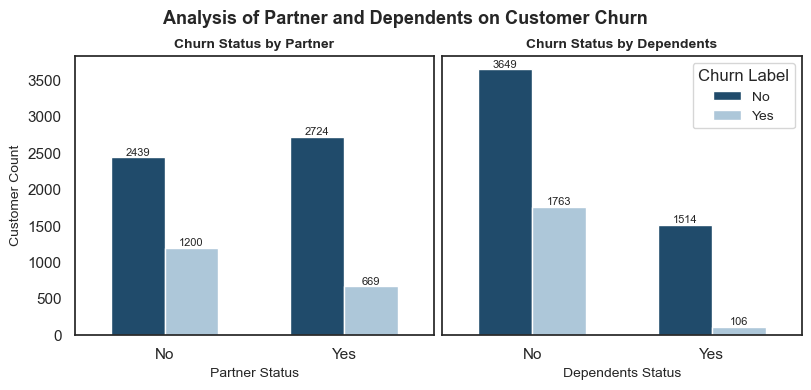

In [32]:
# Create the figure and axes for 2 rows and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(8, 3.5), constrained_layout=True,sharey=True)

# Plot 1: Churn Status by Partner
sns.countplot(x='Partner', data=df, hue='Churn Label', 
              palette=[theme_colors["dark"], theme_colors["light"]],
              ax=axes[0], width=0.6)
axes[0].set_title('Churn Status by Partner', fontsize=10, weight='bold')
axes[0].set_xlabel('Partner Status', fontsize=10)
axes[0].set_ylabel('Customer Count', fontsize=10)
axes[0].legend().remove()
for container in axes[0].containers:
    axes[0].bar_label(container, fontsize=8)

# Plot 3: Churn Status by Dependents
sns.countplot(x='Dependents', data=df, hue='Churn Label',
              palette=[theme_colors["dark"], theme_colors["light"]], 
              ax=axes[1], width=0.6)
axes[1].set_title('Churn Status by Dependents', fontsize=10, weight='bold')
axes[1].set_xlabel('Dependents Status', fontsize=10)
axes[1].set_ylabel('Customer Count', fontsize=10)
axes[1].legend(title='Churn Label', loc='upper right', fontsize=10)
for container in axes[1].containers:
    axes[1].bar_label(container, fontsize=8)

# Add a centered supertitle for the figure
fig.suptitle('Analysis of Partner and Dependents on Customer Churn', fontsize=13, weight='bold', y=1.07)

# Adjust spacing between plots for better readability
plt.subplots_adjust(hspace=0.3, wspace=0.3)

# Show the plots
plt.show()


<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : Partner Status</h3>
</div>


- Among **3,393 customers with partners**, 669 have churned, representing **19.7% of partnered customers** and **9.5% of the total population**.  
- Out of **3,639 customers without partners**, 1,200 have churned, accounting for **32.9% of non-partnered customers** and **17.0% of the total population**.

<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : Dependents Status
    </h3>
</div>

- For customers with **no dependents** (5,412), **1,763 churned**, which is **32.6% of this group**.  
- Among **1,620 customers with dependents**, **106 churned**, representing only **6.5% of this group**.  
---
This highlights that churn is significantly higher among customers without partners or dependents.

<div style="margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">3.3. Service-Based Analysis</h2>
</div>

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
    Churn Distribution Across Categorical Features
    </h3>
</div>

In [33]:
# Define the groups
basic_services = ['Phone Service', 'Multiple Lines', 'Internet Service']
value_added_services = ['Online Security', 'Online Backup', 'Device Protection', 'Tech Support']
streaming_services = ['Streaming TV', 'Streaming Movies']

# Function to plot grouped column
def plot_group(data, columns, title, num_cols=3,leg=[2],bbox_to_anchor=(1.32, 0.5)):
    num_rows = math.ceil(len(columns) / num_cols)
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 4.7 * num_rows))
    axes = axes.flatten()
    
    for i, col in enumerate(columns):
        ax = axes[i]
        sns.countplot(data=data, x=col, hue='Churn Label',
                      palette=[theme_colors["dark"], theme_colors["light"]], ax=ax)
        ax.set_title(f'{col} Distribution by Churn Status', fontsize=12)
        ax.set_xlabel(col, fontsize=10)
        ax.set_ylabel('Count', fontsize=10)
        ax.tick_params(axis='x', rotation=25)
        if i not in leg:
            ax.legend().remove()
        else:
            ax.legend(title='Churn Label', fontsize=6, prop={'size': 8}, loc='center right', bbox_to_anchor=bbox_to_anchor)
    
    # Remove unused subplots
    for j in range(len(columns), len(axes)):
        fig.delaxes(axes[j])
    
    fig.suptitle(title, fontsize=16, weight='bold')
    plt.tight_layout()
    plt.show()

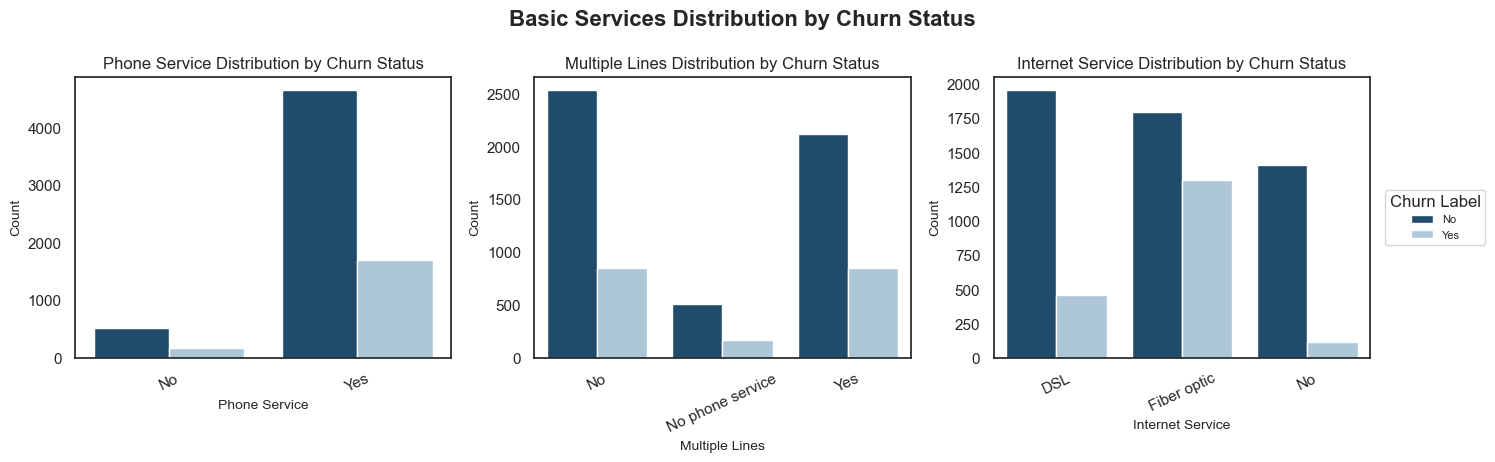

In [34]:
plot_group(df, basic_services, 'Basic Services Distribution by Churn Status')

In [35]:
display(round(pd.crosstab(df['Internet Service'],df['Churn Label'], normalize='columns')*100))
display(round(pd.crosstab(df['Tech Support'],df['Churn Label'], normalize='columns')*100))

Churn Label         No   Yes
Internet Service            
DSL               38.0  25.0
Fiber optic       35.0  69.0
No                27.0   6.0

Churn Label            No   Yes
Tech Support                   
No                   39.0  77.0
No internet service  27.0   6.0
Yes                  34.0  17.0

<div style=" margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : Basic Services Distribution by Churn Status
    </h2>
</div>


<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Phone Service
    </h3>
</div>

- Customers **with Phone Service** have a **churn rate of 27%**, while those **without Phone Service** have a slightly lower churn rate of **25%**.  
- Despite the lower churn rate, the **number of customers with Phone Service** is significantly larger.  
- As a result, the **absolute volume of churned customers** is higher for those with Phone Service.  

<div style=" margin-bottom: 5px;">
    <h4 style="color: #00509E; font-family: Arial, sans-serif;">
Summary :
    </h4>
</div>

Retention strategies should prioritize customers with Phone Service due to their larger population and higher overall churn volume.

---
<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Multiple Lines
    </h3>
</div>

- Customers **without multiple lines** and those **without Phone Service** have a lower churn rate of approximately **25%**.  
- In contrast, customers with **multiple lines** experience a **higher churn rate of 29%**.  
- However, the **absolute number** of customers with multiple lines is larger, making this group more significant in terms of churn volume.

<div style=" margin-bottom: 5px;">
    <h4 style="color: #00509E; font-family: Arial, sans-serif;">
Summary :
    </h4>
</div> 

While churn percentages vary slightly, customers with multiple lines represent a **higher churn risk** and require targeted retention efforts.

---
<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Internet Service
    </h3>
</div>

1. **DSL Service**  
   - Strong retention: **81%** of customers are retained, with only **19%** churning.  

2. **Fiber Optic Service**  
   - High churn: **42%** of customers leave, while **58%** remain.  

3. **No Internet Service**  
   - Very strong retention: **93%** of customers stay, with only **7%** churning.  

<div style=" margin-bottom: 5px;">
    <h4 style="color: #00509E; font-family: Arial, sans-serif;">
Summary :
    </h4>
</div>

- DSL offers the best customer retention among internet services.  
- Fiber Optic Service shows a high churn rate, indicating potential service dissatisfaction.  
- The **No Internet Service** group has the lowest churn, suggesting some customers prefer **no internet service** over poor service quality.


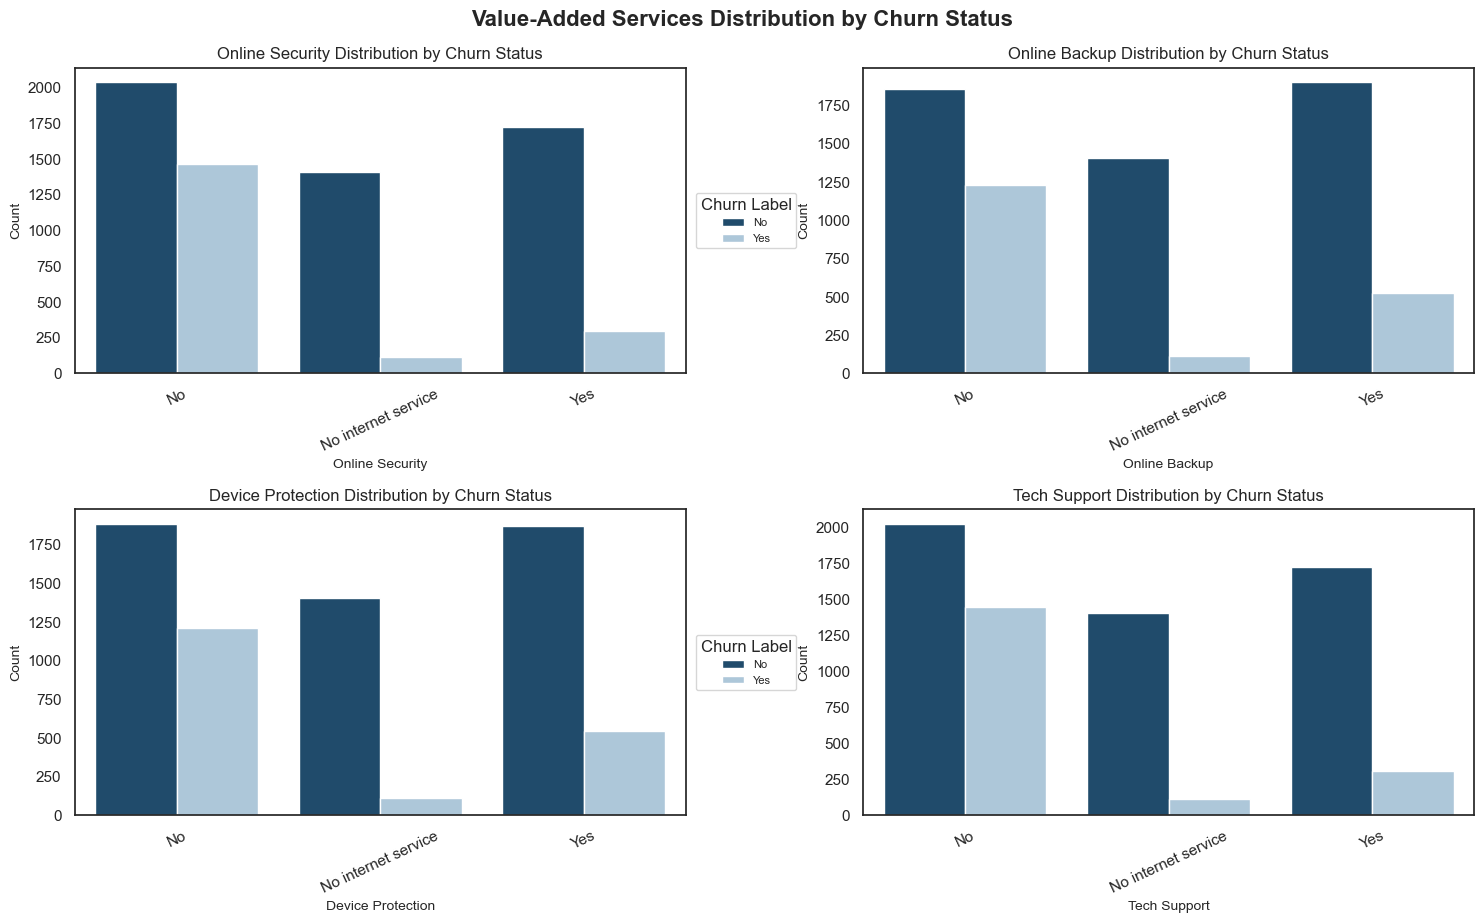

In [36]:
plot_group(df, value_added_services, 'Value-Added Services Distribution by Churn Status',num_cols=2,leg=[0,2],bbox_to_anchor=(1.19,0.5))


<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : Online Security, Online Backup, Device Protection, and Tech Support
    </h3>
</div>

1. **Higher Churn Without Subscriptions**  
   - Customers who **do not subscribe** to value-added services like **Online Security, Online Backup, Device Protection, or Tech Support** experience **higher churn rates (39%-41%)**.  

2. **Lower Churn With Subscriptions**  
   - Customers who **subscribe** to these services have significantly **lower churn rates (15%-22%)**, highlighting the positive impact of these offerings.  

3. **No Internet Service**  
   - Customers with **No Internet Service** maintain the **lowest churn rate (~7%)**, regardless of service subscriptions.  
   
<div style=" margin-bottom: 5px;">
    <h4 style="color: #00509E; font-family: Arial, sans-serif;">
Summary :
    </h4>
</div>

- Value-added services such as Online Security and Tech Support play a **critical role** in improving customer retention among internet service users.  



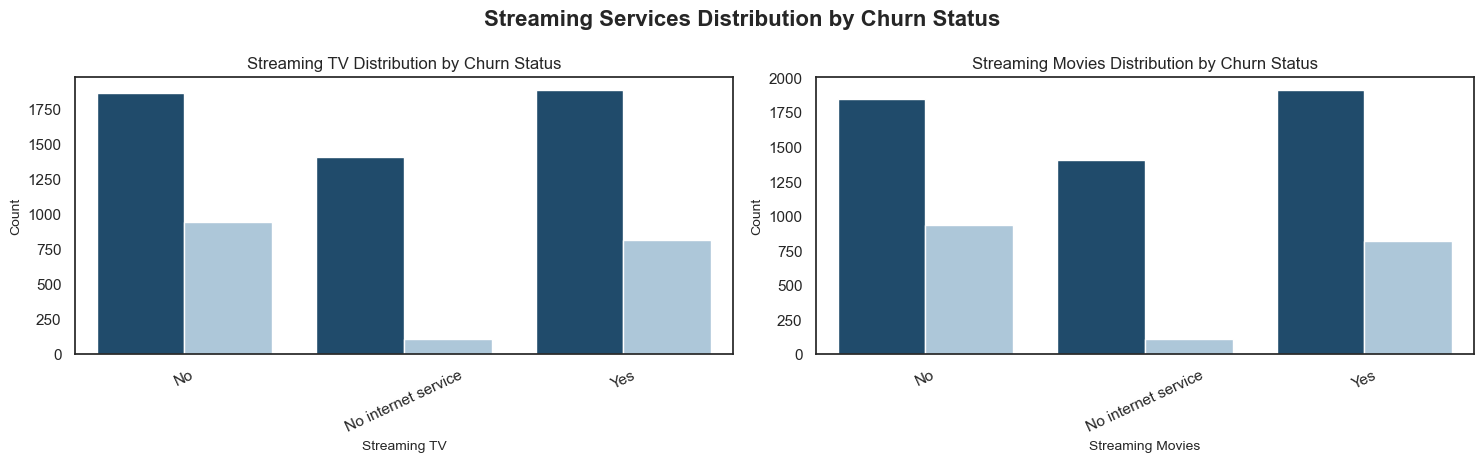

In [37]:
plot_group(df, streaming_services, 'Streaming Services Distribution by Churn Status',num_cols=2)

<div style=" margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : Streaming TV and Streaming Movies
    </h3>
</div>

- Customers who **stream TV or movies** have a **churn rate of ~30%**, slightly lower than non-streamers at **33%**.  
- The difference is minimal, indicating **no significant correlation** between streaming habits and churn.  
- Customers with **No Internet Service** maintain the **lowest churn rate at 7%**.  

<div style=" margin-bottom: 5px;">
    <h4 style="color: #00509E; font-family: Arial, sans-serif;">
Summary :
    </h4>
</div>

- Streaming behavior has a **negligible impact** on churn.  
- The consistently low churn rate in the **No Internet Service** group underscores the need to investigate customer preferences and satisfaction for those opting out of internet services.  


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
"plot_combined_percentages" Function</h3>
</div>

In [38]:
def plot_combined_percentages(ax, data, x, hue, title, 
                              palette=[theme_colors["dark"], theme_colors["base"], theme_colors["light"]],
                              text_font=10,annote=True,stacked=True,width=0.5):
    """
    Function to plot combined Row % and Column % in a single bar plot.

    Args:
        ax: Matplotlib Axes to plot on.
        data: DataFrame containing data.
        x: Column for x-axis.
        hue: Column for hue separation (e.g., 'Churn Label').
        title: Title of the plot.
        palette: Color palette.
    """
    # Group and calculate counts
    group = data.groupby([x, hue],observed=True).size().unstack(fill_value=0)

    # Row percentages
    row_percent = group.div(group.sum(axis=1), axis=0) * 100

    # Column percentages
    col_percent = group.div(group.sum(axis=0), axis=1) * 100

    # Plot the bar chart
    bar = group.plot(kind='bar', stacked=stacked, ax=ax, color=sns.color_palette(palette), edgecolor='black',width=width)
    ax.set_title(title, fontsize=12,weight='bold')
    ax.set_ylabel('Customer Count')
    ax.set_xlabel(x)
    ax.tick_params(axis='x', rotation=30)

    # Add annotations with Row % and Column % in parentheses
    if annote :
        for i, (row_name, row_vals) in enumerate(group.iterrows()):
            total = row_vals.sum()  # Total for the row
            for j, val in enumerate(row_vals):
                if val > 0:  # Avoid labeling empty bars
                    row_pct = row_percent.iloc[i, j].round()  # Row percentage
                    col_pct = col_percent.iloc[i, j].round()  # Column percentage
                    ax.text(i, val / 2 + sum(row_vals[:j]), f"{row_pct}% \n({col_pct}%)",
                            ha='center', va='center', fontsize=text_font, color='black', weight='bold')

    ax.legend(title=hue,prop={'size':8},fontsize=8)
    

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Churn Distribution by Contract Type
    </h3>
</div>

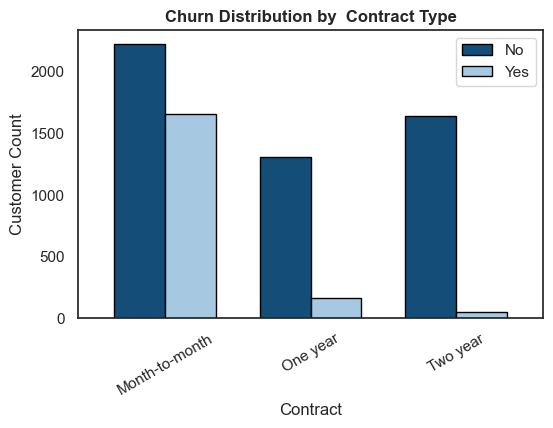

In [39]:
# Create a figure with two subplots
fig, axes = plt.subplots(1, 1, figsize=(6, 5)) 
plot_combined_percentages(axes, df, x='Contract', hue='Churn Label',
                          title='Churn Distribution by  Contract Type',
                          annote=False,palette=[theme_colors["dark"], theme_colors["light"]],stacked=False,width=0.7)

axes.legend(bbox_to_anchor=(1,1))
# Improve layout
fig.tight_layout(pad=2.0, rect=[0, 0, 1, 0.95])  # Adjust spacing while keeping the title in place
plt.savefig('Churn Distribution by  Contract Type.png')
plt.show()


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Churn Analysis by Contract Type with Percentages in Table Format
</h3>
</div>

In [40]:
# Function to calculate the total count for a specific contract type
def calculate_contract_total(contract, data):
    return data.loc[data['Contract'] == contract, 'Customer Count'].sum()

# Group the data by Contract and Churn Label
grouped_data = (
    df.groupby(['Contract', 'Churn Label'], observed=False)['Churn Label']
    .agg(['count'])
    .reset_index()
)

# Rename columns for clarity
grouped_data.rename(columns={'count': 'Customer Count'}, inplace=True)

# Calculate the overall percentage
grouped_data['Overall Percentage'] = (grouped_data['Customer Count'] / grouped_data['Customer Count'].sum()) * 100

# Calculate % within Contract Type
grouped_data['Percentage Within Contract'] = grouped_data.apply(
    lambda row: (row['Customer Count'] / calculate_contract_total(row['Contract'], grouped_data)) * 100, axis=1
)

# Calculate % within Churn Label
total_no_churn = grouped_data.loc[grouped_data['Churn Label'] == 'No', 'Customer Count'].sum()
total_yes_churn = grouped_data.loc[grouped_data['Churn Label'] == 'Yes', 'Customer Count'].sum()

grouped_data['Percentage Within Churn'] = grouped_data.apply(
    lambda row: (row['Customer Count'] / total_no_churn * 100) if row['Churn Label'] == 'No' 
    else (row['Customer Count'] / total_yes_churn * 100), axis=1
)

# Format percentages
grouped_data['Overall Percentage'] = grouped_data['Overall Percentage'].round(2)
grouped_data['Percentage Within Contract'] = grouped_data['Percentage Within Contract'].round(2)
grouped_data['Percentage Within Churn'] = grouped_data['Percentage Within Churn'].round(2)

In [41]:
# Enhance table style with gradient and formatting
styled_table = (
    grouped_data.style
    .background_gradient(cmap='Blues', subset=['Customer Count', 'Overall Percentage', 
                                               'Percentage Within Contract', 'Percentage Within Churn'])
    .format({
        'Overall Percentage': '{:.0f}%',
        'Percentage Within Contract': '{:.0f}%',
        'Percentage Within Churn': '{:.0f}%',
        'Customer Count': '{:.0f}'  # No decimals for counts
    })
    .set_properties(**{'font-family': 'Arial', 'font-size': '11pt'})
    .set_table_styles([
        {'selector': 'th', 'props': [('font-size', '12pt'), ('font-weight', 'bold'), 
                                     ('background-color', '#D6EAF8'), ('color', '#154360')]}
    ])
    .hide(axis='index')  # Hides the index for a cleaner look
)

styled_table

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : </h3>
</div>

The graphs clearly show that **contract type plays a major role in customer retention**:  

1. **Month-to-Month Plan**:  
   - These customers have the **highest churn rate** at **43%** (row percentage).  
   - They contribute to **89%** of the total churn (column percentage), highlighting their significant role in overall churn.  
     
2. **One-Year Plan**:  
   - Churn rate drops significantly to **11%**, with a much smaller **9%** contribution to total churn.  
   - This indicates better retention compared to month-to-month plans.  

3. **Two-Year Plan**:  
   - Customers on this plan show the **best retention**, with a minimal churn rate of **3%** and a **3%** contribution to total churn.  

<div style="margin-bottom: 5px;">
    <h4 style="color: #00509E; font-family: Arial, sans-serif;">
Summary : 
    </h4>
</div>

Month-to-month plans are the **most vulnerable to churn**, making them a key focus area for retention strategies. Offering incentives, discounts, or encouraging customers to transition to longer-term contracts could significantly reduce churn.


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Churn Analysis: Impact of Paperless Billing and Payment Method (Charts)
</h3>
</div>


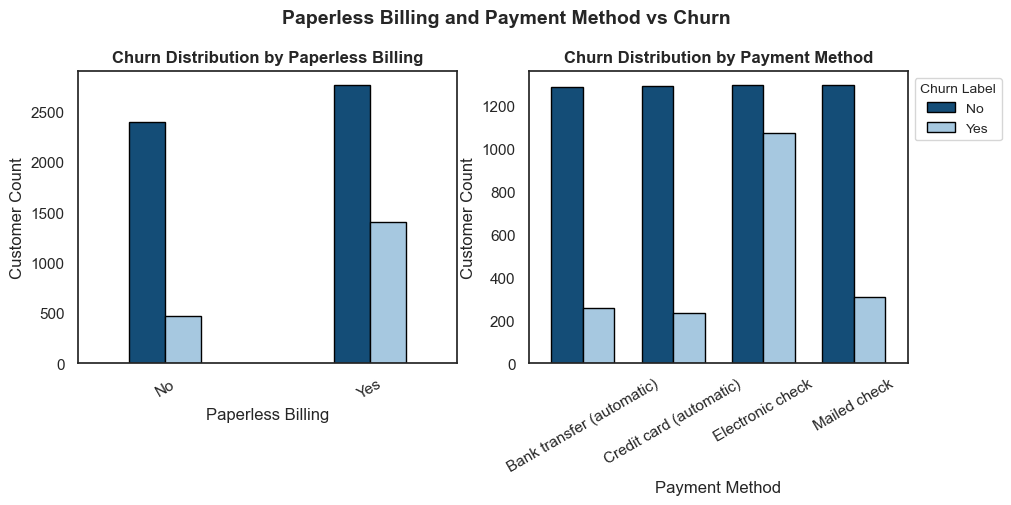

In [42]:
# Plot the charts
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Paperless Billing and Payment Method vs Churn', fontsize=14, weight='bold')

# Plot 1: Paperless Billing
plot_combined_percentages(axes[0], df, x='Paperless Billing', hue='Churn Label',
                          title='Churn Distribution by Paperless Billing',
                          palette=[theme_colors["dark"], theme_colors["light"]],annote=False,width=0.35,stacked=False)

# Plot 2: Payment Method
plot_combined_percentages(axes[1], df, x='Payment Method', hue='Churn Label',
                          title='Churn Distribution by Payment Method',
                          palette=[theme_colors["dark"], theme_colors["light"]]
                          ,annote=False,width=0.7,stacked=False)
axes[0].legend().remove()
axes[1].legend(bbox_to_anchor=(1,1),title='Churn Label',title_fontsize=10,fontsize=10)

fig.tight_layout(pad=.25, rect=[0, 0, 1, 0.95])
plt.show()


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Paperless Billing vs Churn: Count and Percentage Summary Table
    </h3>
</div>


In [43]:
# Group data by Paperless Billing and Churn Label
summary = df.groupby(['Paperless Billing', 'Churn Label'],observed=True).size().unstack(fill_value=0)
summary_percentage = (summary.div(summary.sum(1), axis=0) * 100).round()

display(summary)
display(summary_percentage)


Churn Label          No   Yes
Paperless Billing            
No                 2395   469
Yes                2768  1400

Churn Label          No   Yes
Paperless Billing            
No                 84.0  16.0
Yes                66.0  34.0

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : Paperless Billing</h3>
</div>

- **Paperless Billing users churn more often (34%) and make up most of the churn group (75%).**  

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : Payment Method</h3>
</div>

- **Electronic Check users have the highest churn rate (45%) and contribute the most to churn (57%).**

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
        Distribution of Tenure Months by Churn Label Using Density Plot
    </h3>
</div>

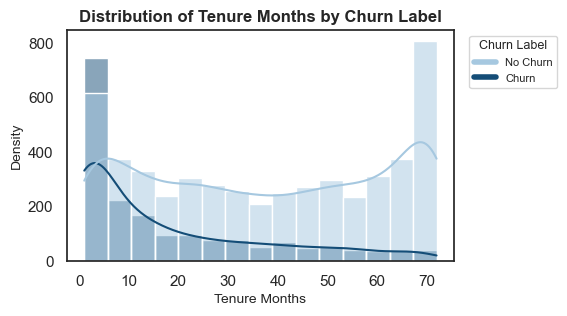

In [44]:
plt.figure(figsize=(5, 3))

# Plot the histogram
sns.histplot(
    data=df,
    x='Tenure Months',
    hue='Churn Label',
    kde=True,
    common_norm=False,
    palette=[theme_colors["light"], theme_colors["dark"]]
)

# Set plot titles and labels
plt.title('Distribution of Tenure Months by Churn Label', fontsize=12, weight='bold')
plt.xlabel('Tenure Months', fontsize=10)
plt.ylabel('Density', fontsize=10)

# Manually add a custom legend
plt.legend(
    handles=[
        plt.Line2D([0], [0], color=theme_colors["light"], lw=4, label='No Churn'),
        plt.Line2D([0], [0], color=theme_colors["dark"], lw=4, label='Churn'),
    ],
    title='Churn Label',
    loc='upper right',
    bbox_to_anchor=(1.28, 1),
    fontsize=8,
    title_fontsize=9
)

# Save or show the plot
plt.savefig('Distribution of Tenure Months by Churn Label.png', dpi=300, bbox_inches='tight')
plt.show()


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

1. **High Churn in Early Tenure**:
   - A significant proportion of customers who churned did so within the first few months of their tenure. This indicates that churn is most prevalent during the initial period, likely pointing to onboarding or early service issues as a potential factor.

2. **Steady Decrease in Churn Over Time**:
   - The churn rate declines as tenure months increase, suggesting that customers who stay longer are more likely to remain loyal. This could indicate that retention strategies for long-tenured customers are effective, or simply that satisfied customers naturally stay longer.

3. **Peak Non-Churn at Maximum Tenure**:
   - There is a spike in customers with the maximum tenure who have not churned, which suggests that a subset of the customer base is very stable and highly loyal.

4. **Distribution Shape**:
   - The density distribution for "No Churn" spans across the tenure months, with consistent loyalty in later months.
   - Meanwhile, the churned population shows a sharp decline after the initial few months.

5. **Retention Strategy Implications**:
   - Focus on the first few months to identify and mitigate causes of early churn, such as improving customer onboarding, addressing common issues quickly, or offering incentives for staying longer.
   - Strengthen engagement and satisfaction efforts for mid-tenure customers to reduce churn further.

This analysis indicates a need to focus on the early tenure months to effectively lower the churn rate.

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Impact of Monthly Charges, Total Charges, and Tenure Months on Customer Churn</h3>
</div>

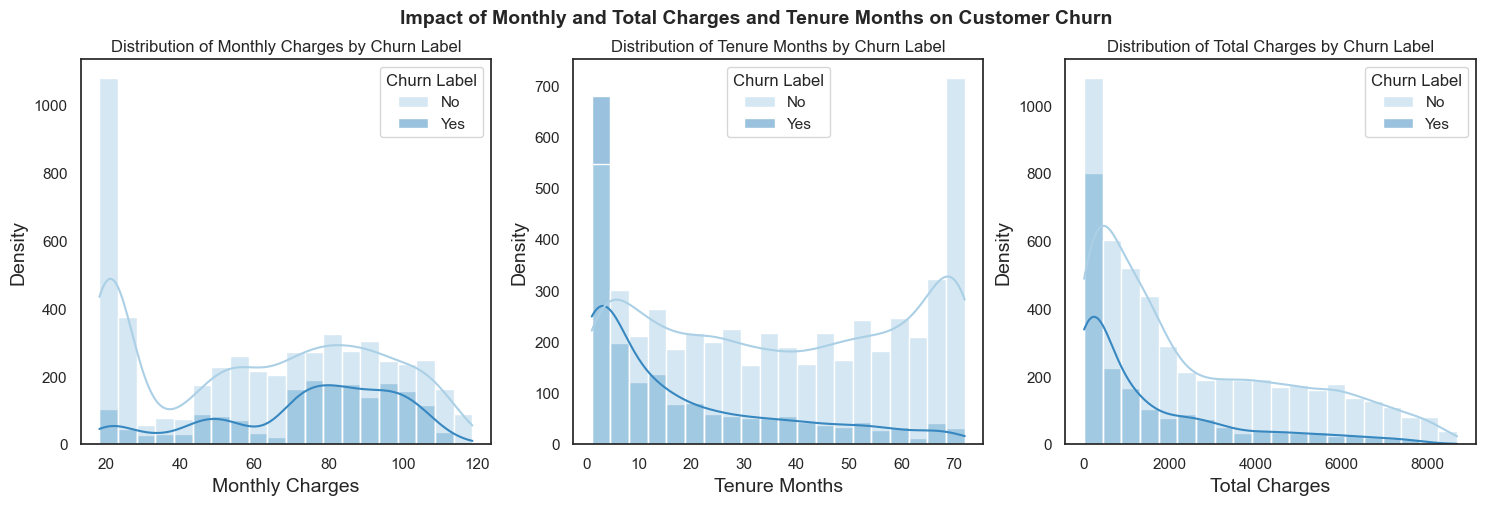

In [45]:
fig,axes = plt.subplots(1,3,figsize=(18,5)) 
fig.suptitle("Impact of Monthly and Total Charges and Tenure Months on Customer Churn", fontsize=14, weight='bold')
palette=[theme_colors["dark"], theme_colors["light"]]
p1 = sns.histplot(data=df, x='Monthly Charges', hue='Churn Label',kde = True,common_norm=False, palette='Blues',bins=20,ax=axes[0])
p1.set_title('Distribution of Monthly Charges by Churn Label', fontsize=12)
p1.set_xlabel('Monthly Charges', fontsize=14)
p1.set_ylabel('Density', fontsize=14)

p2 = sns.histplot(data=df, x='Total Charges', hue='Churn Label',kde = True,common_norm=False, palette='Blues',bins=20,ax=axes[2])
p2.set_title('Distribution of Total Charges by Churn Label', fontsize=12)
p2.set_xlabel('Total Charges', fontsize=14)
p2.set_ylabel('Density', fontsize=14)

p3 = sns.histplot(data=df, x='Tenure Months', hue='Churn Label',kde = True,common_norm=False, palette='Blues',bins=20,ax=axes[1])
p3.set_title('Distribution of Tenure Months by Churn Label', fontsize=12)
p3.set_xlabel('Tenure Months', fontsize=14)
p3.set_ylabel('Density', fontsize=14)

plt.show()


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>


1. **Monthly Charges and Churn**:
   - Customers paying **higher monthly charges (approximately \$70–\$100)** are significantly more likely to churn compared to those paying lower amounts. 
   - This indicates that **pricing strategy and affordability** may play a crucial role in customer retention.

2. **Tenure and Churn**:
   - The **early tenure period (0–15 months)** shows a high churn rate. 
   - This suggests that **customer onboarding and satisfaction in the initial months** are critical for reducing churn.

3. **Long-Tenure Customers**:
   - Customers with **longer tenures (above 36 months)** are much less likely to churn, suggesting a stronger loyalty among long-term customers. 
   - Retention efforts might already be effective for this segment.

4. **Total Charges and Churn**:
   - Customers with **higher total charges** have lower churn rates, likely because total charges correlate with tenure. 
   - Long-term customers who have invested more in the service seem more satisfied and less likely to leave.

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Box Plot Comparison of Monthly Charges, Tenure, and Total Charges by Churn Label</h3>
</div>

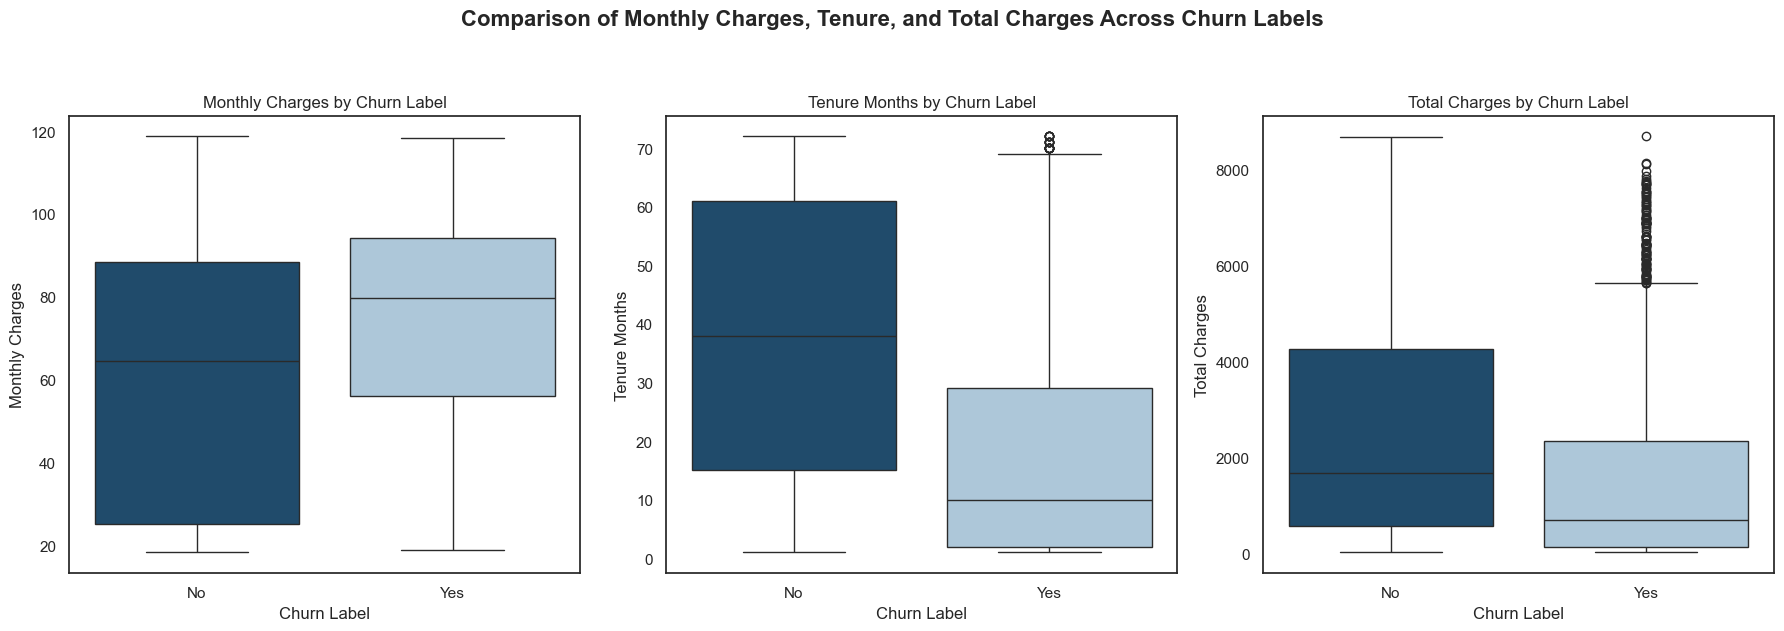

In [46]:
# Set up the figure and axes
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Comparison of Monthly Charges, Tenure, and Total Charges Across Churn Labels', fontsize=16, weight='bold', y=1.05)

# Box Plot 1: Monthly Charges
sns.boxplot(data=df, x='Churn Label', hue='Churn Label',y='Monthly Charges', palette=palette, ax=axes[0])
axes[0].set_title('Monthly Charges by Churn Label')
axes[0].set_xlabel('Churn Label')
axes[0].set_ylabel('Monthly Charges')

# Box Plot 2: Tenure Months
sns.boxplot(data=df, x='Churn Label', hue='Churn Label', y='Tenure Months', palette=palette, ax=axes[1])
axes[1].set_title('Tenure Months by Churn Label')
axes[1].set_xlabel('Churn Label')
axes[1].set_ylabel('Tenure Months')

# Box Plot 3: Total Charges
sns.boxplot(data=df, x='Churn Label', hue='Churn Label', y='Total Charges', palette=palette, ax=axes[2])
axes[2].set_title('Total Charges by Churn Label')
axes[2].set_xlabel('Churn Label')
axes[2].set_ylabel('Total Charges')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

We can reinforce our findings from the histogram plots with insights from the box plots:

- **Monthly Charges**: Churned customers have a higher median monthly charge compared to non-churners, highlighting that higher charges may contribute to churn.  
   
- **Tenure Months**: Most churned customers have significantly shorter tenures, with values well below the median tenure of non-churners. This confirms that churn tends to occur early in the customer lifecycle.  

- **Total Charges**: Since churned customers have shorter tenures, their total charges are naturally lower compared to those who stayed, aligning with the earlier observations.

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Scatter Plot Comparison of Tenure vs Monthly Charges by Churn Label and Internet Service </h3>
</div>

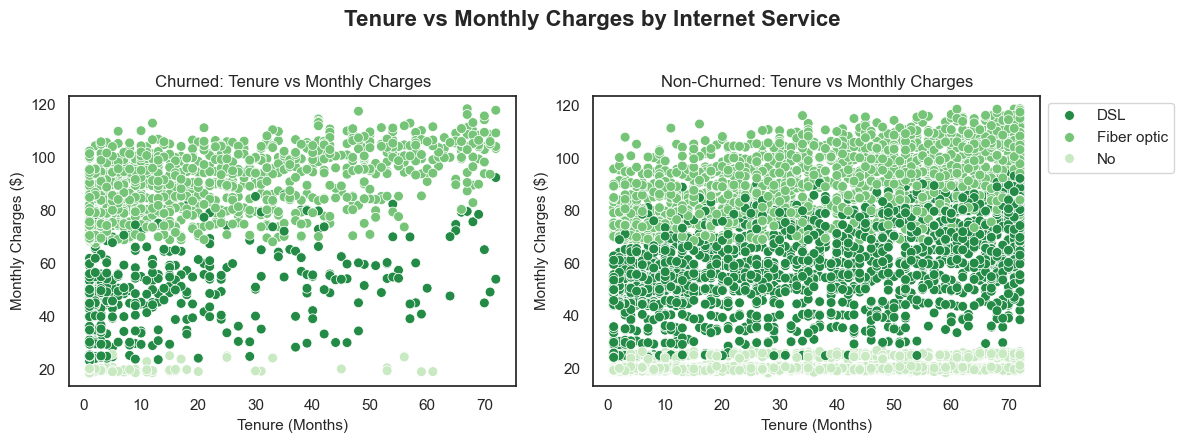

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

churned = df[df['Churn Label'] == 'Yes']
non_churned = df[df['Churn Label'] == 'No']
palette=[theme_colors["dark"], theme_colors["base"], theme_colors["light"]]

sns.scatterplot(
    data=churned, x='Tenure Months', y='Monthly Charges', 
    hue='Internet Service', palette='Greens_r', s=50, ax=axes[0]
)
axes[0].set_title('Churned: Tenure vs Monthly Charges', fontsize=12)
axes[0].set_xlabel('Tenure (Months)', fontsize=11)
axes[0].set_ylabel('Monthly Charges ($)', fontsize=11)
axes[0].legend().remove()
sns.scatterplot(
    data=non_churned, x='Tenure Months', y='Monthly Charges', 
    hue='Internet Service', palette='Greens_r', s=50, ax=axes[1]
)
axes[1].set_title('Non-Churned: Tenure vs Monthly Charges', fontsize=12)
axes[1].set_xlabel('Tenure (Months)', fontsize=11)
axes[1].set_ylabel('Monthly Charges ($)', fontsize=11)
axes[1].legend(bbox_to_anchor=(1,1))

# Add an overall title for the figure
fig.suptitle('Tenure vs Monthly Charges by Internet Service', fontsize=16, weight='bold')

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Add space for the main title
# plt.savefig('Scatter Plots.png')
plt.show()

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

- **Churned Customers:**  
     - **Early Tenures:** Customers across **all internet service types** (Fiber Optic, DSL, No Internet) churn at comparable rates in the early tenure (e.g., ≤1 year). This suggests that other factors, like poor onboarding or initial dissatisfaction, may contribute to churn during this critical period.  
     - **Fiber Optic Dominance:** As tenure increases, churn among **Fiber Optic customers** significantly outweighs other types. This indicates that the **higher cost of Fiber Optic** service may not justify its perceived value for some customers over time.  

   - **Non-Churned Customers:**  
     - **Retention of Fiber Optic Customers:** Despite higher monthly charges, Fiber Optic users with longer tenures are retained. This suggests that those who stay likely recognize the value of the service or benefit from incentives. **Strategies like offering discounts or loyalty rewards could strengthen retention further.**

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;"> Scatter Plot Comparison of Tenure vs Monthly Charges by Churn Label and Tech Support</h3>
</div>

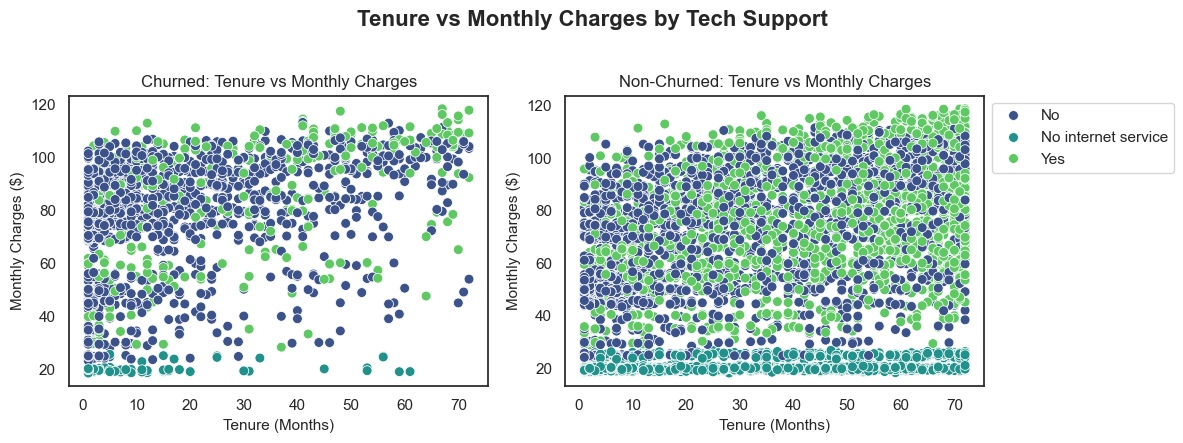

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

sns.scatterplot(
    data=churned, x='Tenure Months', y='Monthly Charges', 
    hue='Tech Support', palette='viridis', s=50, ax=axes[0]
)
axes[0].set_title('Churned: Tenure vs Monthly Charges', fontsize=12)
axes[0].set_xlabel('Tenure (Months)', fontsize=11)
axes[0].set_ylabel('Monthly Charges ($)', fontsize=11)

sns.scatterplot(
    data=non_churned, x='Tenure Months', y='Monthly Charges', 
    hue='Tech Support', palette='viridis', s=50, ax=axes[1]
)
axes[1].set_title('Non-Churned: Tenure vs Monthly Charges', fontsize=12)
axes[1].set_xlabel('Tenure (Months)', fontsize=11)
axes[1].set_ylabel('Monthly Charges ($)', fontsize=11)
axes[0].legend().remove()
axes[1].legend(bbox_to_anchor=(1,1))
fig.suptitle('Tenure vs Monthly Charges by Tech Support', fontsize=16, weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Add space for the main title
plt.show()

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

   - **Churned Customers:**  
     - A **lack of tech support subscription** is strongly linked to churn, especially among customers in the **early stages of tenure** (≤1 year). This indicates that customers who face technical issues without sufficient support are more likely to leave.  
     - As tenure progresses, customers without tech support continue to churn, albeit at reduced rates, highlighting the **importance of tech support in customer retention**.  

   - **Non-Churned Customers:**  
     - **Increased Tech Support Usage:** Customers with longer tenures are more likely to subscribe to tech support. This correlation suggests that tech support builds trust and loyalty, particularly among higher-paying customers. **Investing in tech support quality and accessibility could yield long-term benefits.**


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Scatter Plot Comparison of Tenure vs Monthly Charges by Churn Label and Contract Type</h3>
</div>

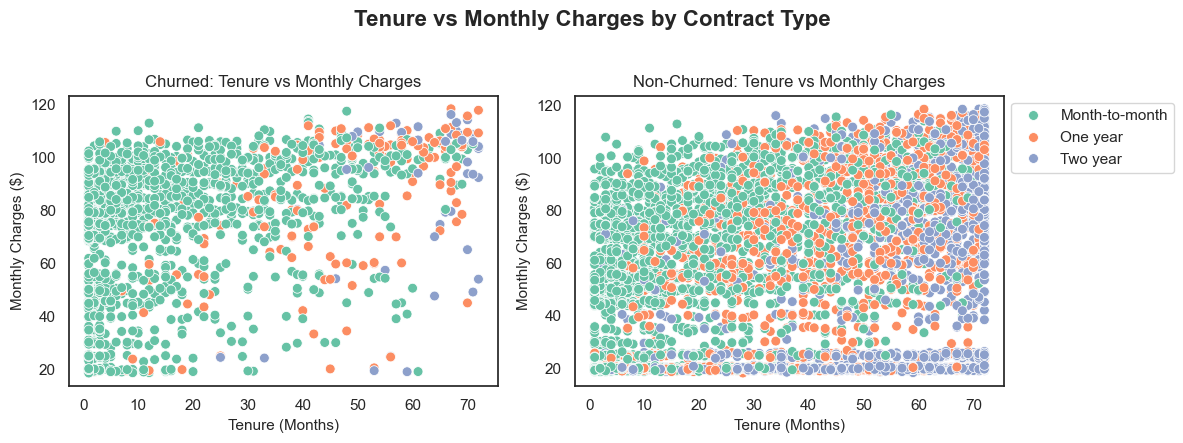

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4.5))

sns.scatterplot(
    data=churned, x='Tenure Months', y='Monthly Charges', 
    hue='Contract', palette='Set2', s=50, ax=axes[0]
)
axes[0].set_title('Churned: Tenure vs Monthly Charges', fontsize=12)
axes[0].set_xlabel('Tenure (Months)', fontsize=11)
axes[0].set_ylabel('Monthly Charges ($)', fontsize=11)

sns.scatterplot(
    data=non_churned, x='Tenure Months', y='Monthly Charges', 
    hue='Contract', palette='Set2', s=50, ax=axes[1]
)
axes[1].set_title('Non-Churned: Tenure vs Monthly Charges', fontsize=12)
axes[1].set_xlabel('Tenure (Months)', fontsize=11)
axes[1].set_ylabel('Monthly Charges ($)', fontsize=11)

axes[0].legend().remove()
axes[1].legend(bbox_to_anchor=(1,1))

fig.suptitle('Tenure vs Monthly Charges by Contract Type', fontsize=16, weight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.savefig('Tenure vs Monthly Charges by Contract Type.png', dpi=300, bbox_inches='tight')

plt.show()

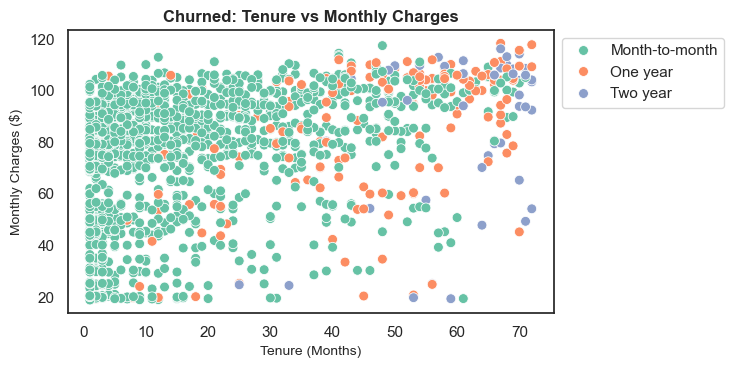

In [50]:
plt.figure(figsize=(7.5,4))
ax = sns.scatterplot(
    data=churned, x='Tenure Months', y='Monthly Charges', 
    hue='Contract', palette='Set2', s=50,
)
ax.set_title('Churned: Tenure vs Monthly Charges', fontsize=12,weight='bold')
ax.set_xlabel('Tenure (Months)', fontsize=10)
ax.set_ylabel('Monthly Charges ($)', fontsize=10)
ax.legend(bbox_to_anchor=(1,1))
plt.tight_layout(rect=[0, 0, 1, 0.96])  
plt.savefig('Tenure vs Monthly Charges by Contract Type.png', dpi=300, bbox_inches='tight')

plt.show()

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

- **Churned Customers:**  
     - **Month-to-Month Contracts:** These contracts are disproportionately associated with churn, particularly in **early tenure periods**. This flexibility allows customers to leave easily, and churn is exacerbated among **Fiber Optic users** with higher monthly charges.  
     - **High Costs and Low Commitment:** Customers on month-to-month contracts who perceive their bills as too high (e.g., Fiber Optic customers) are more likely to churn, indicating a need for tailored retention offers (e.g., discounts or bundles).  

   - **Non-Churned Customers:**  
     - **Impact of Long-Term Contracts:** Long-term contracts (1 and 2 years) significantly reduce churn. Customers are more likely to remain engaged, benefiting from price stability and service consistency. Offering **renewal incentives** for these customers could further strengthen retention.  

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Key Takeaways From Above Scatter Plots  
    </h3>
</div>

1. **Early Tenure Focus:**  
   - Most churn happens within the **first year**, irrespective of the service type or additional subscriptions. Addressing initial dissatisfaction through targeted onboarding, incentives, or trial tech support could drastically reduce churn.  

2. **Fiber Optic Retention Strategies:**  
   - Fiber Optic customers churn more in later tenures due to high costs. Providing **tiered plans**, data-based pricing, or loyalty discounts could improve retention.  

3. **Tech Support as a Retention Tool:**  
   - Investing in tech support and offering it as part of **default packages** could improve satisfaction and retention, especially for new and high-paying customers.  

4. **Contract Design:**  
   - Encouraging long-term contracts by offering incentives (e.g., discounts or perks) could significantly reduce churn among cost-sensitive customers.  

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Scatter Plots of Tenure vs Churn Score by Churn Label </h3>
</div>

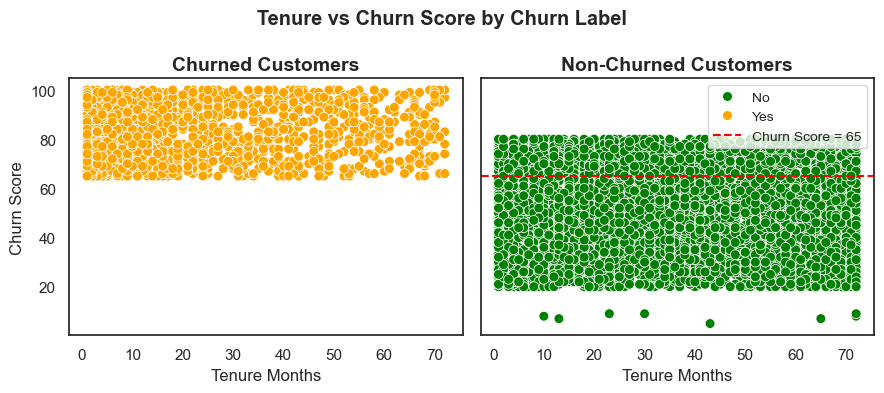

In [51]:
# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(9, 4), sharey=True)
axes = axes.flatten()
plt.suptitle('Tenure vs Churn Score by Churn Label', weight='bold')
# Scatter plot for Churned customers
sns.scatterplot(
    data=df[df['Churn Label'] == 'Yes'], 
    x='Tenure Months', y='Churn Score', hue='Churn Label',palette=['green','orange'],
    s=50, ax=axes[0]
)
axes[0].set_title('Churned Customers', fontsize=14, weight='bold')
axes[0].set_xlabel('Tenure Months', fontsize=12)
axes[0].set_ylabel('Churn Score', fontsize=12)
axes[0].legend().remove()  # Remove legend from the first plot

# Scatter plot for Non-Churned customers
sns.scatterplot(
    data=df[df['Churn Label'] == 'No'], 
    x='Tenure Months', y='Churn Score',hue='Churn Label',palette=['green','orange'],
    s=50, ax=axes[1]
)
axes[1].set_title('Non-Churned Customers', fontsize=14, weight='bold')
axes[1].set_xlabel('Tenure Months', fontsize=12)


# Add a horizontal line to the second plot
axes[1].axhline(y=65, color='red', linestyle='--', linewidth=1.5, label='Churn Score = 65')

# Add a legend for the horizontal line
axes[1].legend(loc='upper right', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.savefig('Scatter Plots of Tenure vs Churn Score by Churn Label.png', dpi=300, bbox_inches='tight')

plt.show()


In [52]:
df.groupby(['Churn Label'],observed=False).agg({'Churn Score':['max','min']})

Churn Score    
                    max min
Churn Label                
No                   80   5
Yes                 100  65

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Grouping Churn Scores into Equal Bins</h3>
</div>

In [53]:
# Divide the Churn Score column into 10 equal bins
df['Churn_Score_Group'] = pd.cut(
    df['Churn Score'], 
    bins=10,               # Number of groups
    labels=[f'Group {i}' for i in range(1, 11)],  # Label for each bin
    include_lowest=True    # Include the lowest value in the first bin
)

# Display a sample of the new column
print(df[['Churn Score', 'Churn_Score_Group']].head())

   Churn Score Churn_Score_Group
0           86           Group 9
1           67           Group 7
2           86           Group 9
3           84           Group 9
4           89           Group 9


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Count Plot for Churn Score Group by Churn Label</h3>
</div>

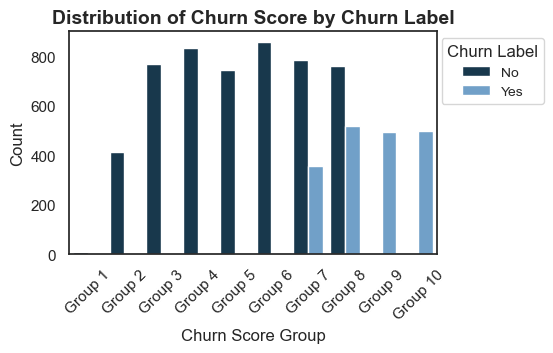

In [54]:
plt.figure(figsize=(6,3.7))
sns.countplot(
    data=df, 
    x='Churn_Score_Group', 
    hue='Churn Label', 
    palette=[theme_colors["darker"], theme_colors["highlight"]]
)

# Minimal styling
plt.title("Distribution of Churn Score by Churn Label", fontsize=14, weight='bold')
plt.xlabel("Churn Score Group", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(title="Churn Label", fontsize=10,bbox_to_anchor=(1.31,1))
plt.xticks(rotation=45)  # Rotate x-axis labels for readability
plt.tight_layout()
plt.savefig('Distribution of Churn Score by Churn Label.png', dpi=300, bbox_inches='tight')
plt.show()


In [55]:
round(pd.crosstab(df['Churn_Score_Group'],df['Churn Label'],normalize='index')*100)

Churn Label           No    Yes
Churn_Score_Group              
Group 1            100.0    0.0
Group 2            100.0    0.0
Group 3            100.0    0.0
Group 4            100.0    0.0
Group 5            100.0    0.0
Group 6            100.0    0.0
Group 7             69.0   31.0
Group 8             59.0   41.0
Group 9              0.0  100.0
Group 10             0.0  100.0

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

1. **Low-Risk Groups (1-6):**  
   - Groups 1 to 6 have **100% non-churned customers**, indicating a stable and low-risk segment.

2. **Churn Emerges in Group 7:**  
   - Churn begins to appear with a **31% churn rate**.  
   - This group includes customers with churn scores approaching **65**, marking the threshold where churn risk becomes significant.

3. **Escalating Risk (Groups 8-10):**  
   - Churn increases sharply to **41%** in Group 8.  
   - Groups 9 and 10 consist entirely of **churned customers (100% churn rate)**, highlighting the critical nature of these segments.

4. **Retention Focus:**  
   - Prioritize customers with churn scores **≥65** for retention efforts.  
   - Consider preemptive strategies for customers in Group 7 (scores near 65) to address emerging risks.

<div style="margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">3.4. Geographic and Population Analysis</h2>
</div>

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;"> Heatmap of Churned Customers' Geographic Distribution (Latitude and Longitude)</h3>
</div>


In [56]:
import folium
from folium.plugins import HeatMap

# Filter for churned customers
churned_customers = df[df['Churn Label'] == 'Yes']

# Create a base map
base_map = folium.Map(location=[churned_customers['Latitude'].mean(), churned_customers['Longitude'].mean()], zoom_start=6)

# Add a heatmap layer
heat_data = churned_customers[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data).add_to(base_map)

# Display the map
base_map.save("churn_heatmap.html")
base_map

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;"> Heatmap of Non-Churned Customers' Geographic Distribution</h3>
</div>

In [57]:
# Filter for non-churned customers
non_churned_customers = df[df['Churn Label'] == 'No']

# Create a base map
base_map = folium.Map(location=[non_churned_customers['Latitude'].mean(), non_churned_customers['Longitude'].mean()], zoom_start=6)

# Add a heatmap layer
heat_data = non_churned_customers[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data).add_to(base_map)

# Display the map
base_map.save("non_churn_heatmap.html")
base_map

In [58]:
# Set the default renderer for Plotly visualizations to "notebook"
# This ensures that plots are rendered directly within the Jupyter Notebook environment
import plotly.io as pio
pio.renderers.default = 'notebook'


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;"> Interactive Scatter Map of Churned Customer Distribution by Location</h3>
</div>

In [59]:
fig = px.scatter_mapbox(
    df[df['Churn Label']=='Yes'],
    lat='Latitude', lon='Longitude',
    color='Churn Label',
    
#     size='Monthly Charges',
    hover_name='Churn Reason',
    color_continuous_scale='Cividis',
    mapbox_style='open-street-map',
    title='Churned customer Distribution by Location',
    color_discrete_sequence=['red']
)
fig.write_html('Churned_customer_Distribution_by_Location.html')
fig.show()

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;"> Interactive Scatter Map of Non-Churned Customer Distribution by Location</h3>
</div>

In [60]:
fig = px.scatter_mapbox(
    df[df['Churn Label']=='No'],
    lat='Latitude', lon='Longitude',
    #color='Reason Category',
    color='Churn Label',
    #size='Monthly Charges',
    hover_name='Churn Reason',
    color_continuous_scale='Viridis',
    mapbox_style='open-street-map',
    title='Non Churner customer Distribution by Location'
)
fig.write_html('Non-Churned_customer_Distribution_by_Location.html')
fig.show()

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

1. **Urban Concentration:**  
   - Both churned and non-churned customers are heavily concentrated in urban centers like **Los Angeles** and **San Francisco**, likely mirroring high population densities and stronger infrastructure in these areas.  

2. **Rural Presence:**  
   - Sparse representation in northern and central rural regions suggests **lower market penetration** in these areas, possibly due to limited service availability or lower demand.  

3. **Churn Uniformity Across Locations:**  
   - The similar geographic distributions of churned and non-churned customers imply that **churn is influenced more by customer-specific factors** (e.g., service quality, cost, or customer experience) than by geographic location.

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">K-Means Clustering: City Division into Regions</h3>
</div>


- “To enhance our analysis of 1,129 unique cities, we will employ K-Means clustering to group customers based on their latitude and longitude coordinates. This approach will allow us to create custom regions and identify patterns in customer distribution more effectively.”


In [61]:
print(f"There are {df['City'].nunique()} Unique Cities there.")

There are 1129 Unique Cities there.


In [62]:
from sklearn.cluster import KMeans

num_regions = 4  

# Extract latitude and longitude
coords = df[['Latitude', 'Longitude']]

# Apply K-Means clustering
kmeans = KMeans(n_clusters=num_regions, random_state=42)
df['Region'] = kmeans.fit_predict(coords)

region_map = {0:1,1:2,2:3,3:4,4:5}
df['Region'] = df['Region'].map(region_map)

centers = kmeans.cluster_centers_

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Visualizing City Clusters : Region</h3>
</div>

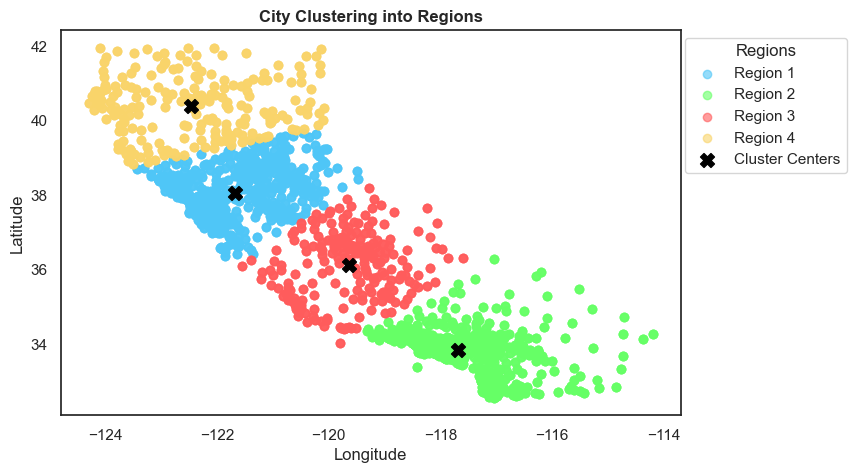

In [63]:
colors = (
    '#4FC6F7',  # Brighter Light Blue
    '#66FF66',  # Brighter Light Green
    '#FF5C5C',  # Brighter Light Coral
    '#F9D46A'   # Brighter Light Goldenrod Yellow
)


# Visualize the clusters
plt.figure(figsize=(8,5))
for region in range(num_regions):
    region_data = df[df['Region'] == region+1]
    plt.scatter(region_data['Longitude'], region_data['Latitude'], label=f'Region {region+1}', alpha=0.6,c=colors[region])
    
plt.scatter(centers[:, 1], centers[:, 0], c='black', marker='X', s=100, label='Cluster Centers')

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('City Clustering into Regions',weight='bold')
plt.legend(bbox_to_anchor=(1.28,1),title='Regions')
plt.show()

<div style="margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">Churn Distribution by Region with Stacked Percentage Visualization</h2>
</div>

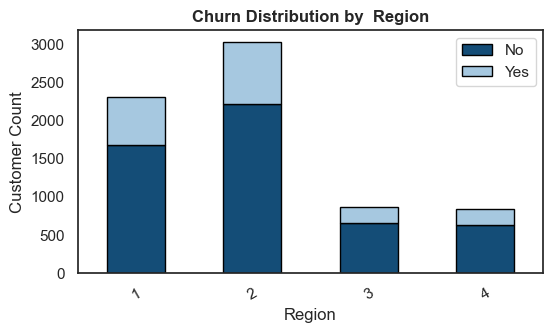

In [64]:
fig, axes = plt.subplots(1, 1, figsize=(6, 4))  # Increase figure size

plot_combined_percentages(axes, df, x='Region', hue='Churn Label',
                          title='Churn Distribution by  Region',text_font=7,
                          palette=[theme_colors["dark"], theme_colors["light"]],
                          annote=False,stacked=True)
plt.legend(loc='upper right')

# Improve layout
fig.tight_layout(pad=2.0, rect=[0, 0, 1, 0.95])  
plt.show()

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

1. **Consistent Churn Rates**: All regions have similar churn percentages, indicating that "Region" is not a strong predictor of churn.  
2. **Customer Base Variations**: Regions 1 and 2 have significantly larger customer bases than Regions 3 and 4, but churn rates remain proportional.  
3. **Focus Areas**: The small customer base in Regions 3 and 4 might need further investigation to identify growth opportunities.

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Adding Population Data by Zip Codes  
</h3>
</div>

![](https://imgur.com/d4ewwiK.png)  

To enhance our analysis, we can incorporate population data by zip codes to explore whether churn rate or customer density correlates with the local population distribution. This additional layer can reveal geographic and demographic factors influencing customer behavior.

Here is a reference source for population data:  
[California Zip Codes by Population](https://www.california-demographics.com/zip_codes_by_population)  



In [65]:
file_path = 'California_DemographicsByZipCode_sample.xlsx'  # Replace this with your actual file name
excel_data = pd.ExcelFile(file_path)

# Load only the first sheet and specify the row for column names
data = pd.read_excel(excel_data, sheet_name=0, header=4, usecols=['name', 'population'])
data = data.iloc[1:]
data.head()

name  population
1  90001       56403
2  90002       52735
3  90003       71708
4  90004       58844
5  90005       38747

In [66]:
data = data.rename({'name':'Zip Code','population':'Population'},axis=1)

In [67]:
data['Zip Code'] = data['Zip Code'].astype('int64')
df = df.merge(data,on='Zip Code',how='left')


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Classifying Customers Based on Population Category</h3>
</div>

In [68]:
def classify_population_category(population):
    if population > 75000:  # High population
        return 'High'
    elif 30000 < population <= 75000:  # Medium population
        return 'Medium'
    elif 10000 < population <= 30000:  # Low population
        return 'Low'
    else:  # Very Low population
        return 'Very Low'


df['Population_Category'] = df['Population'].apply(classify_population_category)


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Churn Distribution by Population Category</h3>
</div>

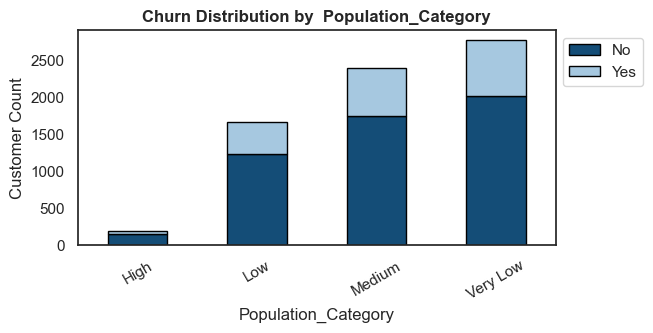

In [69]:
fig, axes = plt.subplots(1, 1, figsize=(7, 4))  # Increase figure size

plot_combined_percentages(axes, df, x='Population_Category', hue='Churn Label',
                          title='Churn Distribution by  Population_Category',text_font=7,
                         palette=[theme_colors["dark"], theme_colors["light"]],annote=False)
plt.legend(loc='upper left',bbox_to_anchor=(1,1))

# Improve layout
fig.tight_layout(pad=2.0, rect=[0, 0, 1, 0.95])  
plt.show()


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

- Churn rates are stable across all population categories, indicating no significant relationship between churn likelihood and population size.
- However, the customer distribution heavily skews towards Very Low and Medium categories.

<div style="margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">3.5 CLTV and Tenure Analysis</h2>
</div>

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Distribution of CLTV by Churn Label</h3>
</div>

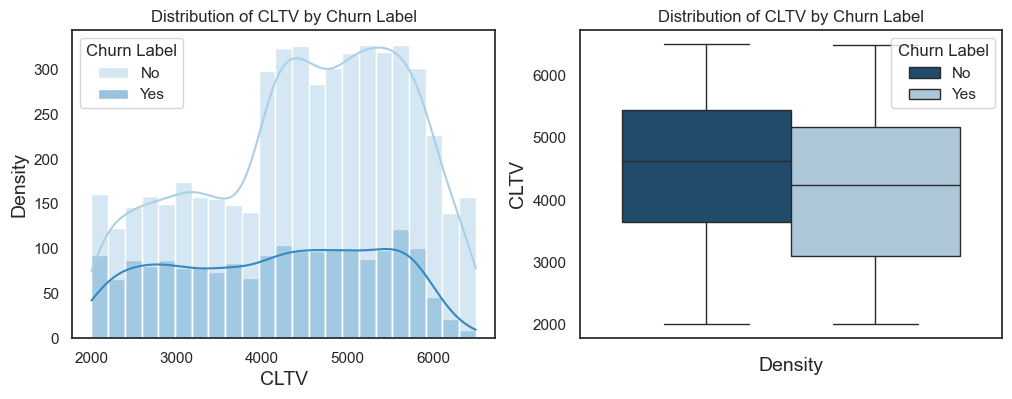

In [70]:
figure,axes = plt.subplots(1,2,figsize=(12, 4))
sns.histplot(data=df, x='CLTV', hue='Churn Label',
             kde = True,common_norm=False,ax=axes[0],
             palette='Blues')
axes[0].set_title('Distribution of CLTV by Churn Label', fontsize=12)
axes[0].set_xlabel('CLTV', fontsize=14)
axes[0].set_ylabel('Density', fontsize=14)



sns.boxplot(data=df, y='CLTV', hue='Churn Label', ax=axes[1],
           palette=[theme_colors["dark"], theme_colors["light"]])
axes[1].set_title('Distribution of CLTV by Churn Label', fontsize=12)
axes[1].set_xlabel('Density', fontsize=14)
axes[1].set_ylabel('CLTV', fontsize=14)
plt.savefig('Distribution of CLTV by Churn Label.png', dpi=300, bbox_inches='tight')
plt.show()


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Summary Statistics of CLTV for Churned and Non-Churned Customers</h3>
</div>

In [71]:

# Combine the summary statistics into a single DataFrame
summary_df = pd.DataFrame({
    "Churned": churned['CLTV'].describe(),
    "Non-Churned": non_churned['CLTV'].describe()
})

# Display the combined DataFrame
display(summary_df)


Churned  Non-Churned
count  1869.000000  5163.000000
mean   4149.414660  4492.679837
std    1189.370707  1166.653300
min    2003.000000  2003.000000
25%    3101.000000  3649.000000
50%    4238.000000  4620.000000
75%    5166.000000  5436.000000
max    6484.000000  6500.000000

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

1. **Churned vs. Non-Churned:**  
   - **Count:** Non-churned customers (5,163) outnumber churned customers (1,869).  
   - **Average CLTV:** Non-churned customers have a higher average CLTV (**\$4,493**) compared to churned customers (**\$4,149**), reflecting an **8.3% increase**.  
   - **Median CLTV:** Non-churned customers' median CLTV (**\$4,620**) is **\$382 higher** than churned customers (**\$4,238**).

2. **Distribution Spread:**  
   - **Interquartile Range (IQR):**  
     - Churned: **\$3,101–\$5,166**  
     - Non-Churned: **\$3,649–\$5,436**  
     Non-churned customers show a narrower middle range, suggesting more consistent value.  
   - **Extremes:** Both groups start at a minimum of **\$2,003**, but non-churned customers reach a slightly higher maximum   (**\$6,500** vs. **\$6,484**). 

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">CLTV vs. Tenure Months: Internet Service Impact on Churn Behavior</h3>
</div>

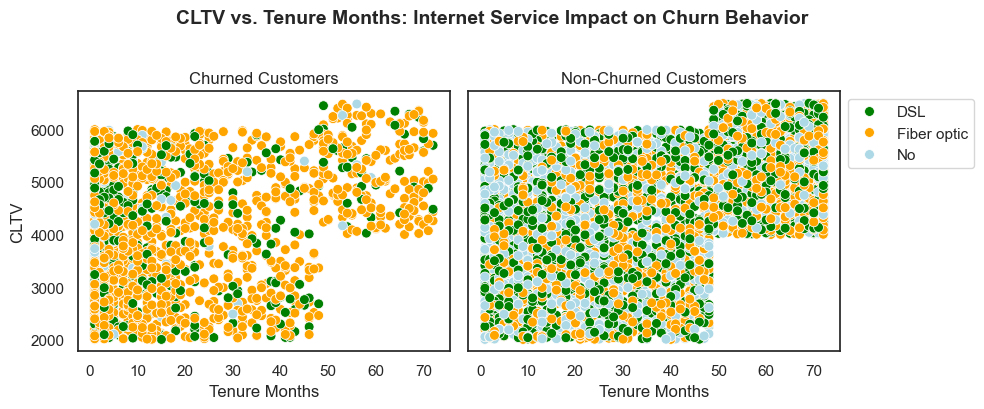

In [72]:
# Create subplots with shared y-axis
fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
axes = axes.flatten()
# Add a suptitle to the plot
fig.suptitle(
    'CLTV vs. Tenure Months: Internet Service Impact on Churn Behavior',
    fontsize=14, weight='bold', y=1.02
)

# Scatter plot for Churned customers
sns.scatterplot(
    data=df[df['Churn Label'] == 'Yes'], 
    x='Tenure Months', y='CLTV', hue='Internet Service',palette=['green','orange','lightblue'],
    s=50, ax=axes[0]
)
axes[0].set_title('Churned Customers', fontsize=12)
axes[0].set_xlabel('Tenure Months', fontsize=12)
axes[0].set_ylabel('CLTV', fontsize=12)
axes[0].legend().remove()  

# Scatter plot for Non-Churned customers
sns.scatterplot(
    data=df[df['Churn Label'] == 'No'], 
    x='Tenure Months', y='CLTV',hue='Internet Service',palette=['green','orange','lightblue'],
    s=50, ax=axes[1]
)
axes[1].set_title('Non-Churned Customers', fontsize=12)
axes[1].set_xlabel('Tenure Months', fontsize=12)

axes[1].legend(bbox_to_anchor=(1,1))

# Adjust layout
plt.tight_layout()
plt.show()


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

1. **Churned Customers:**
   - **Early Tenure Churn:** The majority of churned customers exhibit short tenures, clustering towards the lower end of the tenure axis, irrespective of their CLTV.  
   - **Service Type Impact:** Fiber optic users constitute a significant portion of churned customers, indicating potential service issues or price sensitivity for this group.  
   - **CLTV Observations:** While churned customers generally have lower CLTV, some high-CLTV customers still churn during their early tenure, underscoring the importance of engaging this segment early.

2. **Non-Churned Customers:**
   - **Positive CLTV-Tenure Correlation:** Non-churned customers display a clear upward trend in CLTV with longer tenures, highlighting their growing value over time.  
   - **Service Type Distribution:** These customers are distributed more evenly across Internet Service types, suggesting reduced churn risks for DSL and other services compared to fiber optic.  
   - **High-Value Retention:** High-CLTV non-churned customers with longer tenures underline the importance of fostering loyalty to maximize lifetime value.


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Mapping CLTV Values to Categories: High, Medium, and Low
</h3>
</div>

In [73]:
df['CLTV'].describe()

count    7032.000000
mean     4401.445108
std      1182.414266
min      2003.000000
25%      3469.750000
50%      4527.500000
75%      5381.000000
max      6500.000000
Name: CLTV, dtype: float64

In [74]:
def map_cltv_category(df, cltv_column, new_column):
    """
    Maps CLTV values to categories: High, Medium, and Low.
    
    Parameters:
        df (pd.DataFrame): The dataframe containing the CLTV column.
        cltv_column (str): The name of the column with CLTV values.
        new_column (str): The name of the new column to store the categories.
    
    Returns:
        pd.DataFrame: The dataframe with the new category column added.
    """
    # Define thresholds for categorization
    low_threshold = df[cltv_column].quantile(0.33)
    high_threshold = df[cltv_column].quantile(0.67)
    print("low_threshold = ",low_threshold,"\nhigh_threshold = ",high_threshold)
    
    # Apply categorization
    def categorize_cltv(value):
        if value <= low_threshold:
            return 'Low'
        elif value <= high_threshold:
            return 'Medium'
        else:
            return 'High'
    
    # Create a new column for CLTV categories
    df[new_column] = df[cltv_column].apply(categorize_cltv)
    return df


df = map_cltv_category(df, cltv_column='CLTV', new_column='CLTV_Category')


low_threshold =  3965.0 
high_threshold =  5113.77


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">CLTV Category Distribution by Churn Label and Churned Customer Breakdown by CLTV Category</h3>
</div>

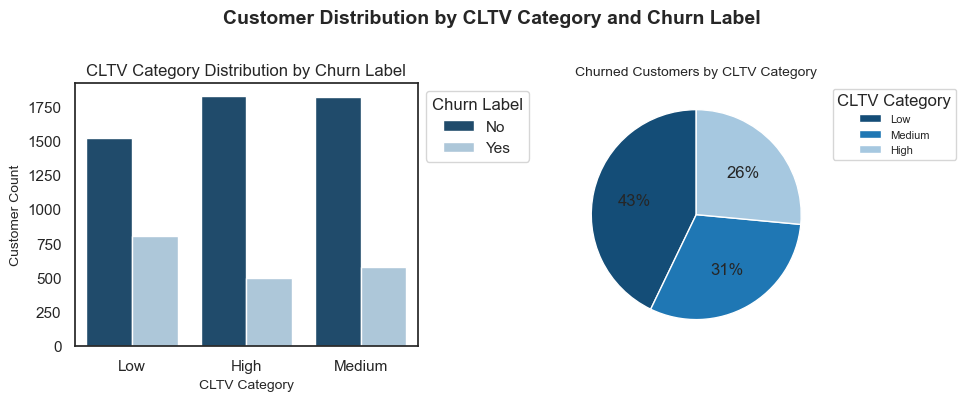

In [75]:
# Create a figure with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# First plot: Countplot for CLTV Categories by Churn Label
sns.countplot(data=df, x='CLTV_Category', hue='Churn Label', 
              palette=[theme_colors["dark"], theme_colors["light"]], ax=axes[0])

# Set labels and title for the first plot
axes[0].set_xlabel('CLTV Category', fontsize=10)
axes[0].set_ylabel('Customer Count', fontsize=10)
axes[0].set_title('CLTV Category Distribution by Churn Label', fontsize=12)
axes[0].legend(title='Churn Label',bbox_to_anchor=(1,1))

# Second plot: Pie chart for Churned Customers by CLTV Category
temp = df[df['Churn Label'] == 'Yes']['CLTV_Category'].value_counts()
temp.plot(
    kind='pie', 
    autopct='%0.0f%%', 
    startangle=90,  
    colors=[theme_colors["dark"], theme_colors["base"], theme_colors["light"]],
    labels=None, 
    ax=axes[1]
)

# Set title and remove y-axis label for the second plot
axes[1].set_title('Churned Customers by CLTV Category', fontsize=10)
axes[1].set_ylabel('')
axes[1].legend(labels=temp.index, title='CLTV Category', loc='best', fontsize=8, bbox_to_anchor=(1,1))

# Add a suptitle for the entire figure
fig.suptitle('Customer Distribution by CLTV Category and Churn Label', fontsize=14, weight='bold', y=1)

# Adjust layout to prevent overlap and ensure clarity
plt.tight_layout()
plt.show()


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

- **Churn Likelihood Distribution:**
  - Low CLTV category: **43%** of churned customers.
  - Medium CLTV category: **31%** of churned customers.
  - High CLTV category: **26%** of churned customers.

- **Profitability and Prioritization:**
  - High CLTV customers are more profitable in the short term, making their retention valuable.
  - However, low CLTV customers should not be overlooked, as retaining them ensures long-term growth.

- **Retention Strategies:**
  - Focused retention efforts can help convert low CLTV customers into medium or high CLTV categories over time.
  - A balanced strategy across all categories promotes sustainable customer value and business success.

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Categorizing Customers Based on Tenure Months</h3>
</div>



In [76]:
def tenure_category(tenure):
    categories = {
        '<=1 year': tenure <= 12,
        '>1-3 years': 12 < tenure <= 36,
        '>3-5 years': 36 < tenure <= 60,
        '>5 years': tenure > 60
    }
    return next(category for category, condition in categories.items() if condition)


df['Tenure Category'] = df['Tenure Months'].apply(lambda x: tenure_category(x))

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Distribution of Churned Customers by CLTV and Tenure Category</h3>
</div>

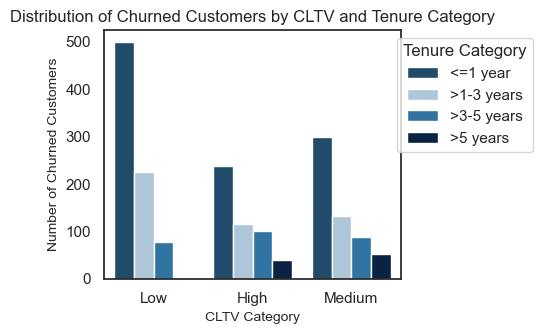

In [77]:
plt.figure(figsize=(6, 3.5))
# Create a count plot for CLTV categories with churn label as hue
sns.countplot(data=df[df['Churn Label'] == 'Yes'], x='CLTV_Category', 
              hue='Tenure Category', 
             palette=[theme_colors["dark"], theme_colors["light"],theme_colors["base"],'#00224D'])

# Improve legend placement and appearance
plt.legend(title='Tenure Category', loc='upper right', bbox_to_anchor=(1.47, 1))

# Add axis labels and a title for clarity
plt.xlabel('CLTV Category', fontsize=10) 
plt.ylabel('Number of Churned Customers', fontsize=10)
plt.title('Distribution of Churned Customers by CLTV and Tenure Category', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>

1. **High churn among low CLTV customers with short tenure:**  
   - Customers in the **Low CLTV category** with a tenure of **≤1 year** represent the largest share of churned customers. This indicates that new customers with low CLTV are at the highest risk of churn.  
   - **If a customer's tenure is short (≤1 year) and their CLTV is low, they should be given high priority in retention efforts.**  

2. **Retention focus on Low CLTV and new customers:**  
   - The priority for retention should be **Low CLTV customers**, particularly those in the early stages of their tenure.  
   - **If a customer’s tenure is greater than a year and their CLTV remains low, it may indicate limited profitability to the company, and such cases can be deprioritized in retention efforts.**  

3. **Decreasing churn as tenure increases:**  
   - Across all CLTV categories, churn significantly reduces for customers with longer tenures (**>5 years**). Retaining customers over time appears to be beneficial in mitigating churn.  

4. **Churn pattern in High and Medium CLTV categories:**  
   - **High CLTV customers** show consistent churn across shorter tenures (**≤1 year and >1-3 years**) but reduce significantly in longer tenures.  
   - **Medium CLTV customers** follow a similar trend, but the churn volume is slightly higher than High CLTV customers in the early years.  

5. **Importance of early retention efforts:**  
   - The churn trend highlights the need for **proactive onboarding strategies** to minimize churn during the critical first year of a customer’s lifecycle.  


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">3.6. Churn Reasons Analysis</h3>
</div>

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Top Churn Reasons</h3>
</div>

In [78]:
df['Churn Reason'].unique()

array(['Competitor made better offer', 'Moved',
       'Competitor had better devices',
       'Competitor offered higher download speeds',
       'Competitor offered more data', 'Price too high',
       'Product dissatisfaction', 'Service dissatisfaction',
       'Lack of self-service on Website', 'Network reliability',
       'Limited range of services',
       'Lack of affordable download/upload speed',
       'Long distance charges', 'Extra data charges', "Don't know",
       'Poor expertise of online support',
       'Poor expertise of phone support', 'Attitude of service provider',
       'Attitude of support person', 'Deceased', nan], dtype=object)

In [79]:
print(f"The dataset contains {df['Churn Reason'].nunique()} unique reasons for customer churn.")

The dataset contains 20 unique reasons for customer churn.


In [80]:
df['Churn Reason'].value_counts().head()

Churn Reason
Attitude of support person                   192
Competitor offered higher download speeds    189
Competitor offered more data                 162
Don't know                                   154
Competitor made better offer                 140
Name: count, dtype: int64

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights : 
    </h3>
</div>


1. **Top Reason: Support Attitude (192 cases):**  
   - Poor support attitude is the leading churn cause.  
   - **Action:** Train support staff to enhance customer interactions.

2. **Competitor Advantage (189-162 cases):**  
   - Customers churn for higher speeds or more data from competitors.  
   - **Action:** Improve speed, offer flexible data plans.

3. **Unclear Reasons (154 cases):**  
   - Many customers are unsure why they churned.  
   - **Action:** Gather feedback to identify dissatisfaction early.

4. **Better Offers (140 cases):**  
   - Competitor pricing and offers drive churn.  
   - **Action:** Create competitive pricing and loyalty programs.  


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Mapping Churn Reasons to Broader Categories</h3>
</div>

To simplifies analysis by grouping similar reasons, making it easier to identify overarching patterns and focus areas for customer retention strategies.

In [81]:
# Define a mapping dictionary for broader categories
reason_mapping = {
    'Price too high': 'Price-related',
    'Extra data charges': 'Price-related',
    'Long distance charges': 'Price-related',
    'Competitor made better offer': 'Competitor-related',
    'Competitor had better devices': 'Competitor-related',
    'Competitor offered higher download speeds': 'Competitor-related',
    'Competitor offered more data': 'Competitor-related',
    'Service dissatisfaction': 'Service-related',
    'Product dissatisfaction': 'Service-related',
    'Network reliability': 'Service-related',
    'Poor expertise of online support': 'Support-related',
    'Poor expertise of phone support': 'Support-related',
    'Attitude of service provider': 'Support-related',
    'Attitude of support person': 'Support-related',
    'Moved': 'Relocation/Other',
    'Deceased': 'Relocation/Other',
    "Don't know": 'Relocation/Other',
}

# Map the reasons to broader categories
df['Reason Category'] = df['Churn Reason'].map(reason_mapping)
df['Reason Category'].value_counts()

Reason Category
Competitor-related    621
Support-related       366
Service-related       294
Relocation/Other      213
Price-related         199
Name: count, dtype: int64

In [82]:
# Percentage share "Reason Category"
round((df['Reason Category'].value_counts()/churned['Churn Label'].count())*100)

Reason Category
Competitor-related    33.0
Support-related       20.0
Service-related       16.0
Relocation/Other      11.0
Price-related         11.0
Name: count, dtype: float64

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights: After Mapping Churn Reasons
    </h3>
</div>

1. **Competitor-related issues dominate:**  
   - After mapping, **Competitor-related reasons** make up the largest category, accounting for **33%** of the total churn. This emphasizes the significant competitive pressures in the market, with reasons like "Competitor offered higher download speeds" and "Competitor offered more data" being common.  

2. **Support-related dissatisfaction remains significant:**  
   - **Support-related reasons** represent **20%** of the churn, reflecting the critical role of customer service. Common issues include dissatisfaction with the "Attitude of support person."  

3. **Service-related and price-related issues combined for clarity:**  
   - **Service-related issues** account for **16%** of churn and include dissatisfaction with products or network reliability.  
   - **Price-related concerns**, making up **11%**, highlight issues such as high costs, long-distance charges, or data overages. Together, these categories represent **27%** of the churn and provide actionable areas to address strategically.  

4. **Broader categories simplify focus:**  
   - The mapping process grouped individual reasons like "Attitude of support person" into actionable categories, highlighting overarching issues rather than scattered individual reasons.  

5. **Relocation/Other is notable but less actionable:**  
   - **Relocation/Other reasons**, comprising **11%**, include factors like "Moved" or "Don't know." While less within the company’s control, these reasons are still relevant for understanding churn dynamics.  


<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">Top 3 Churn Reasons by Tenure Category</h3>
</div>

In [83]:
# Group the data and count the occurrences of each churn reason
grouped = df.groupby(['Tenure Category', 'Reason Category'], observed=True)['Churn Reason']\
            .count().rename('Count').reset_index()

# Sort within each Tenure Category to fetch the top 5 reasons
top_reasons = grouped.groupby('Tenure Category', group_keys=False)\
                     .apply(lambda x: x.nlargest(3, 'Count')).loc[:,['Tenure Category','Reason Category','Count']]

# Display the result
top_reasons


Tenure Category     Reason Category  Count
0         <=1 year  Competitor-related    353
4         <=1 year     Support-related    202
3         <=1 year     Service-related    160
5       >1-3 years  Competitor-related    144
9       >1-3 years     Support-related     93
8       >1-3 years     Service-related     75
10      >3-5 years  Competitor-related     91
14      >3-5 years     Support-related     51
13      >3-5 years     Service-related     41
15        >5 years  Competitor-related     33
19        >5 years     Support-related     20
18        >5 years     Service-related     18

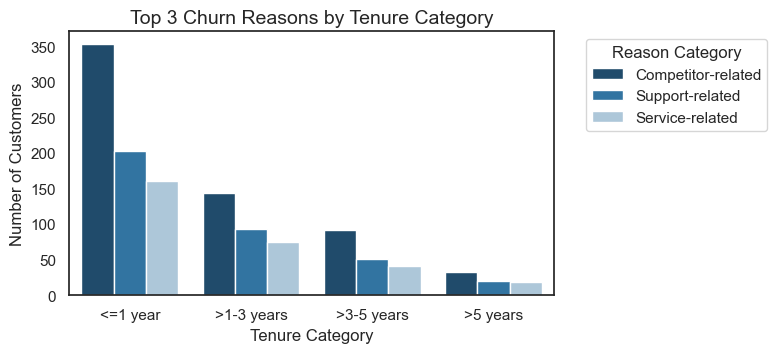

In [84]:
# Set figure size for better readability
plt.figure(figsize=(8, 3.7))

# Create a bar plot with Tenure Category on the x-axis, Count as the height, and Reason Category as the hue

sns.barplot(
    data=top_reasons,
    x='Tenure Category',
    y='Count',
    hue='Reason Category',
    palette=[theme_colors["dark"], theme_colors["base"], theme_colors["light"]]
)
# Add labels and a title to make the plot informative
plt.xlabel('Tenure Category', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.title('Top 3 Churn Reasons by Tenure Category', fontsize=14)

# Improve legend placement
plt.legend(title='Reason Category', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust layout for better spacing
plt.tight_layout()
plt.savefig('Top 3 Churn Reasons.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()


In [85]:
def top_reason_perc(df, category_column, count_column, new_column):
    
    total_counts = df.groupby(category_column)[count_column].transform('sum')
    
    df[new_column] = round((df[count_column] / total_counts) * 100)
    return df


top_reasons = top_reason_perc(top_reasons, 'Tenure Category', 'Count', 'Percentage')

top_reasons

Tenure Category     Reason Category  Count  Percentage
0         <=1 year  Competitor-related    353        49.0
4         <=1 year     Support-related    202        28.0
3         <=1 year     Service-related    160        22.0
5       >1-3 years  Competitor-related    144        46.0
9       >1-3 years     Support-related     93        30.0
8       >1-3 years     Service-related     75        24.0
10      >3-5 years  Competitor-related     91        50.0
14      >3-5 years     Support-related     51        28.0
13      >3-5 years     Service-related     41        22.0
15        >5 years  Competitor-related     33        46.0
19        >5 years     Support-related     20        28.0
18        >5 years     Service-related     18        25.0

<div style="margin-bottom: 5px;">
    <h3 style="color: #00509E; font-family: Arial, sans-serif;">
Insights :
    </h3>
</div>

1. **Competitor-related churn dominates across all tenure categories**:  
   - **Competitor-related reasons** consistently emerge as the leading cause of churn across all tenure categories, with the highest counts observed in the **≤1 year** category. This suggests that customers are easily influenced by competitive offerings during the early stages of their tenure.

2. **Support-related and service-related issues follow a similar pattern**:  
   - **Support-related issues** rank second, indicating dissatisfaction with customer support services as a significant factor influencing churn.  
   - **Service-related issues**, including dissatisfaction with the product or network reliability, are the third most common churn driver, particularly affecting customers during shorter tenures.

3. **Churn trend decreases with tenure**:  
   - Churn due to all reasons, including competitor-related, reduces significantly as tenure increases, especially after **>3 years**. However, the dominance of competitor-related issues remains consistent.

4. **Actionable Insight**:  
   - Efforts should focus on addressing **competitor-related factors**, such as improving value propositions, offering competitive deals, and enhancing customer loyalty programs, particularly targeting customers in their first year.  
   - Strengthening **support and service quality** can further mitigate churn for medium-tenure customers.



<div style="margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">4. Insight Summary</h2>
</div>

1. **Churn Rate**:  
   - The overall churn rate is **27%**, indicating a significant portion of customers leaving the service.  

2. **Churn Score**:  
   - Customers with churn scores of **65 or higher** represent **75% of all churned customers**, highlighting the score’s reliability as a predictive measure.  

3. **Tenure**:  
   - **40%** of churned customers have been with the company for **1 year or less**, emphasizing the importance of early retention strategies.  
   - Churn decreases significantly for customers with **>3 years of tenure**, where only **5%** churn.  

4. **Customer Lifetime Value (CLTV)**:  
   - Churned customers have an average CLTV that is **8% lower** than retained customers.  
   - Customers with higher CLTVs and longer tenure show better retention rates.  

5. **Churn Reasons**:  
   - **Competitor-related reasons** lead churn, cited by **33%** of customers.  
   - **Support-related issues**, including poor interactions, are reported by **20%** of churned customers.  
   - **Pricing concerns**, like high costs or inflexible plans, account for **11%** of churn reasons.  

6. **Service Usage Patterns**:  
   - Customers with **Fiber Optic Internet** have a churn rate of **42%**, significantly higher than those using DSL (**19%**) or no internet service (**7%**).  
   - Value-added services (e.g., tech support) correlate strongly with retention, with churn rates dropping to **15-22%** for users of these services.  

7. **Demographics**:  
   - Senior citizens churn at a higher rate (**25%**) compared to younger customers (**12%**).  
   - Customers without dependents or partners are at a higher risk of leaving.  

8. **Contract and Billing Factors**:  
   - **Month-to-month contracts** show the highest churn at **43%**, compared to **11%** for 1-year plans and **3%** for 2-year plans.  
   - Customers using **electronic checks** have the highest churn rate (**45%**) compared to those using credit cards or bank transfers.  

<div style="margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;"> 5. Recommendations </h2>
</div>

1. **Early Retention Focus**:  
   - Enhance onboarding processes to address churn in the first year of tenure, where churn is highest.  
   - Implement loyalty incentives for early-tenure customers, such as discounts or added benefits.  

2. **Targeted Engagement for High Churn Scores**:  
   - Monitor customers with churn scores **≥ 65** and deploy proactive retention measures, including personalized offers and enhanced support.  

3. **Improve Customer Support**:  
   - Invest in staff training to address support-related churn issues, as **20%** of churned customers cite dissatisfaction with support.  
   - Implement post-interaction surveys to identify and resolve service gaps quickly.  

4. **Competitor Analysis and Pricing Strategy**:  
   - Conduct competitor benchmarking to address churn caused by **higher speeds** or **better data plans** (which are related to fibre optic), which drive **33%** of churn cases.  
   - Offer flexible and competitive pricing plans tailored to customer usage patterns, addressing **11%** of churn cases linked to pricing concerns.  

5. **Value-Added Services Promotion**:  
   - Encourage subscriptions to services like online security, tech support, and device protection, which can reduce churn by **15-22%**.  

6. **Focus on Long-Term Contracts**:  
   - Promote **1-year and 2-year contracts** with added incentives to reduce churn from month-to-month plans (**43% churn rate**).  

7. **Tailored Retention for High-Value Customers**:  
   - Identify **high-CLTV customers with high Churn Score** and provide personalized retention strategies, such as VIP benefits or exclusive offers.  

8. **Segmented Geographic and Demographic Strategy**:  
   - Focus retention efforts on senior citizens, who have a **25% churn rate**, and customers in regions with high churn rates.  
   - Explore correlations between population density and churn to refine location-specific strategies.  


<div style="margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">Caveats and Assumptions</h2>
</div>

1. **Fictional Dataset:**  
   - The dataset is fictional and created by IBM, which means insights and recommendations may not directly apply to real-world scenarios.  

2. **Data Scope:**  
   - The analysis is based on 7,043 customers from a single quarter in California, limiting geographic and temporal generalizability.   

3. **Feature Assumptions:**   
   - Customer Lifetime Value (CLTV) is treated as static, though in real-world applications, it could fluctuate over time.  

4. **Simplified Segmentation:**   
   - Churn score thresholds and demographic groupings are used for simplicity; real-world behavior may require more granular segmentation.  

5. **Exclusions:**   
   - Variables such as "Country," "State," "Count," and "Customer ID" were excluded due to their limited analytical value.  

6. **Predictive Model Not Implemented:**   
   - This project focuses on descriptive analysis rather than building predictive models, which would enhance actionable insights.  

7. **Churn Score and CLTV Usage:**   
   - Assumes churn score and CLTV metrics are accurately computed and relevant for identifying churn risks and customer value.  

8. **Business Context Assumed:**   
   - Recommendations assume that improving onboarding, support, and pricing strategies align with business goals, though operational constraints may exist.  

<div style="margin-bottom: 5px;">
    <h2 style="color: #00509E; font-family: Arial, sans-serif;">Conclusion</h2>
</div>  

This project analyzed a fictional telco customer churn dataset to uncover key factors influencing customer retention. The churn rate of 27% highlights the importance of addressing churn proactively. Key insights point to the critical role of tenure, contract types, churn score, and value-added services in retention strategies.  

Targeted recommendations, such as enhancing onboarding experiences, improving support quality, offering competitive pricing, and promoting long-term contracts, can significantly reduce churn risk. While the dataset and analysis provide a strong foundation, the insights must be adapted to real-world conditions for practical implementation.  

This project underscores the value of data-driven strategies in optimizing customer retention and enhancing business outcomes.  